In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2019
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2019-03-01 to 2019-05-31
Columns: 394 entries, 10000009 to 9000451
dtypes: float64(394)
memory usage: 283.9 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-03-01  0.860686  0.685168  0.469020  0.896480  0.526439  0.620240   
2019-03-02  0.843139  0.684634  0.408254  0.880459  0.523393  0.618129   
2019-03-03  0.917183  0.732568  0.420892  0.945862  0.586824  0.662077   
2019-03-04  1.067996  0.858964  0.542164  1.067479  0.721480  0.755374   
2019-03-05  1.244702  0.899759  0.577476  1.148799  0.718185  0.753091   
...              ...       ...       ...       ...       ...       ...   
2019-05-27  0.654653  0.578912  0.250378  0.750206  0.505167  0.605501   
2019-05-28  0.680061  0.596988  0.243669  0.770061  0.501152  0.602719   
2019-05-29  0.611207  0.538947  0.198734  0.719296  0.447647  0.565648   
2019-05-30  0.589229  0.526922  0.191733  0.710453  0.449873  0.567190   
2019-05-31  0.602421  0.519558  0.190532  0.712012  0.442127  0.561823   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-03-01  0.698806  0.673466  

          2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  \
10000009    0.017546    0.035785    0.087157   -0.052802   -0.174600   
10000010   -0.070420   -0.060025   -0.073500   -0.150872   -0.330399   
10000011   -0.178748   -0.227086   -0.344729   -0.299502   -0.475964   
10000014    0.035485    0.058344    0.112114   -0.053045   -0.217916   
10000016   -0.149971   -0.157489   -0.200331   -0.215374   -0.412410   
...              ...         ...         ...         ...         ...   
9000015     0.238606    0.294256    0.457171    0.177937    0.113793   
9000172     0.057780    0.108574    0.274792    0.112415   -0.048215   
9000173     0.700055    0.771314    0.935094   -0.253318   -0.698450   
9000293     0.091336    0.108096    0.177828    0.140164    0.380634   
9000451    -0.031806   -0.029430    0.055165   -0.056377   -0.217690   

          2019-03-06  2019-03-07  2019-03-08  2019-03-09  2019-03-10  ...  \
10000009   -0.182158   -0.146008    0.044640   -0.071478  

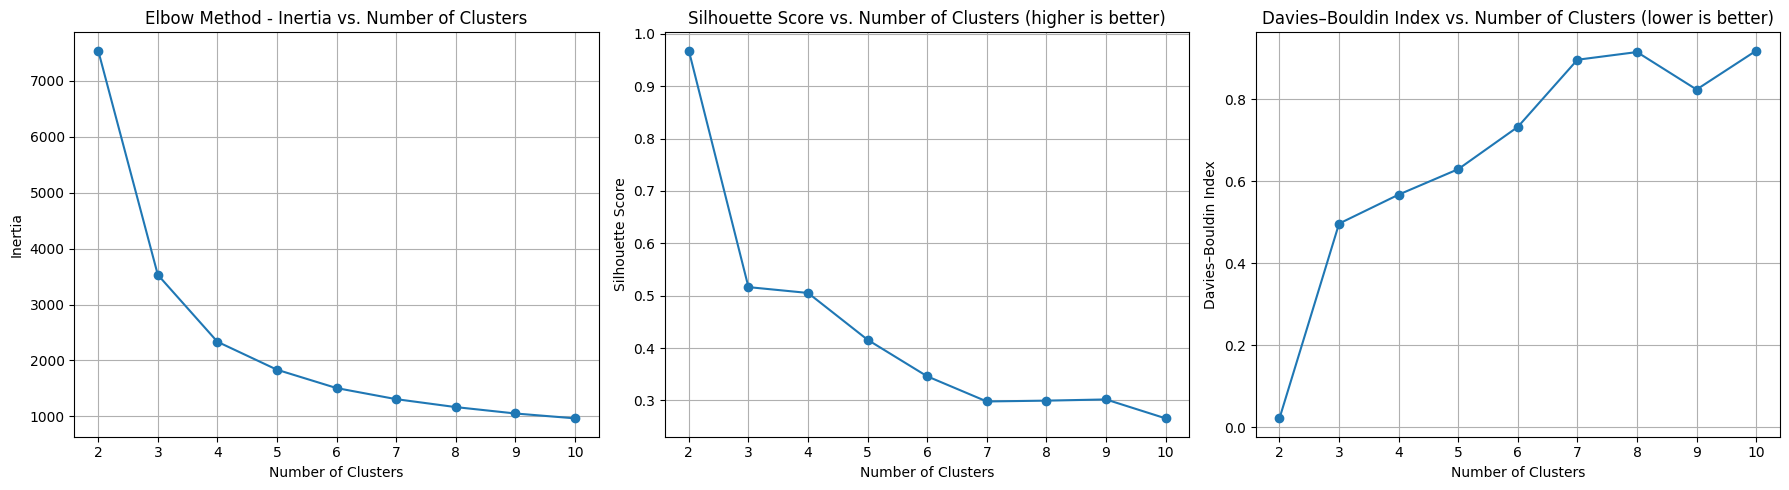

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-03-01  0.860686  0.685168  0.469020  0.896480  0.526439  0.620240   
2019-03-02  0.843139  0.684634  0.408254  0.880459  0.523393  0.618129   
2019-03-03  0.917183  0.732568  0.420892  0.945862  0.586824  0.662077   
2019-03-04  1.067996  0.858964  0.542164  1.067479  0.721480  0.755374   
2019-03-05  1.244702  0.899759  0.577476  1.148799  0.718185  0.753091   
...              ...       ...       ...       ...       ...       ...   
2019-05-27  0.654653  0.578912  0.250378  0.750206  0.505167  0.605501   
2019-05-28  0.680061  0.596988  0.243669  0.770061  0.501152  0.602719   
2019-05-29  0.611207  0.538947  0.198734  0.719296  0.447647  0.565648   
2019-05-30  0.589229  0.526922  0.191733  0.710453  0.449873  0.567190   
2019-05-31  0.602421  0.519558  0.190532  0.712012  0.442127  0.561823   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-03-01  0.698806  0.673466  

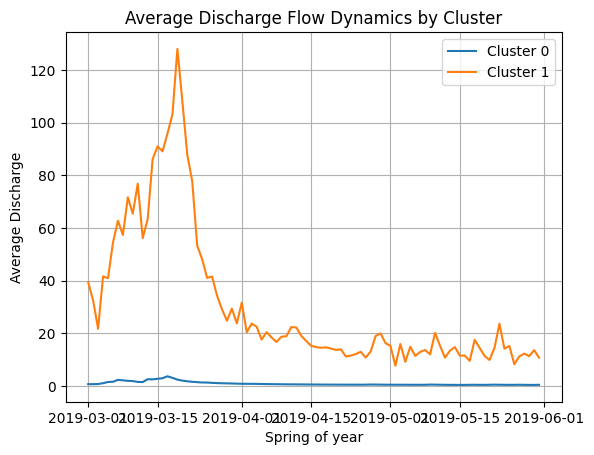

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2019-03-01  0.860686  0.685168  0.469020  0.896480  0.526439  0.620240   
2019-03-02  0.843139  0.684634  0.408254  0.880459  0.523393  0.618129   
2019-03-03  0.917183  0.732568  0.420892  0.945862  0.586824  0.662077   
2019-03-04  1.067996  0.858964  0.542164  1.067479  0.721480  0.755374   
2019-03-05  1.244702  0.899759  0.577476  1.148799  0.718185  0.753091   
...              ...       ...       ...       ...       ...       ...   
2019-05-27  0.654653  0.578912  0.250378  0.750206  0.505167  0.605501   
2019-05-28  0.680061  0.596988  0.243669  0.770061  0.501152  0.602719   
2019-05-29  0.611207  0.538947  0.198734  0.719296  0.447647  0.565648   
2019-05-30  0.589229  0.526922  0.191733  0.710453  0.449873  0.567190   
2019-05-31  0.602421  0.519558  0.190532  0.712012  0.442127  0.561823   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-03-01  0.698806  0.673466  1.472287  1.010929  ...  1.009901  0.927540   
2019-03-02  0.660042  0.636108  1.416211  0.983793  ...  0.924119  0.863426   
2019-03-03  0.814949  0.785398  1.389272  1.114581  ...  0.949703  0.997331   
2019-03-04  1.097804  1.057996  1.419782  1.390297  ...  1.458450  1.281049   
2019-03-05  1.399240  1.348502  1.476412  1.734942  ...  6.688924  1.688503   
...              ...       ...       ...       ...  ...       ...       ...   
2019-05-27  0.204042  0.196643  0.563948  0.621131  ...  0.609899  0.375593   
2019-05-28  0.193309  0.186299  0.562592  0.604537  ...  0.398546  0.452985   
2019-05-29  0.177378  0.170946  0.552376  0.577503  ...  0.302583  0.387024   
2019-05-30  0.176268  0.169876  0.539628  0.591621  ...  0.243783  0.351924   
2019-05-31  0.175664  0.169294  0.550750  0.581875  ...  0.304405  0.338679   

             7000333   8000001   9000001   9000015   9000172   9000173  \
2019-03-01  0.761446  0.950660  1.459146  1.301770  0.940966  2.222502   
2019-03-02  0.737725  0.904866  1.425365  1.270746  0.963559  2.059976   
2019-03-03  0.830724  0.973106  1.504905  1.342376  1.132799  1.891569   
2019-03-04  1.109995  1.201141  1.745361  1.559810  1.420150  0.640603   
2019-03-05  1.160507  1.471988  2.102615  1.883207  1.524519  0.084889   
...              ...       ...       ...       ...       ...       ...   
2019-05-27  0.535042  0.610245  1.146495  1.033287  0.567480  0.499227   
2019-05-28  0.522452  0.612896  1.126634  1.015220  0.491203  0.457119   
2019-05-29  0.456161  0.543866  1.088051  0.980061  0.400286  0.410204   
2019-05-30  0.444955  0.518290  1.076779  0.969843  0.452177  0.244376   
2019-05-31  0.429987  0.506216  1.081581  0.974294  0.412172  0.134840   

             9000293   9000451  
2019-03-01  1.007921  0.762215  
2019-03-02  0.962769  0.735248  
2019-03-03  1.021376  0.880421  
2019-03-04  1.479297  1.060376  
2019-03-05  2.473998  1.149300  
...              ...       ...  
2019-05-27  0.182224  0.271367  
2019-05-28  0.144652  0.250287  
2019-05-29  0.129132  0.228738  
2019-05-30  0.151898  0.238846  
2019-05-31  0.099375  0.245783  

[92 rows x 394 columns]

<Axes: >

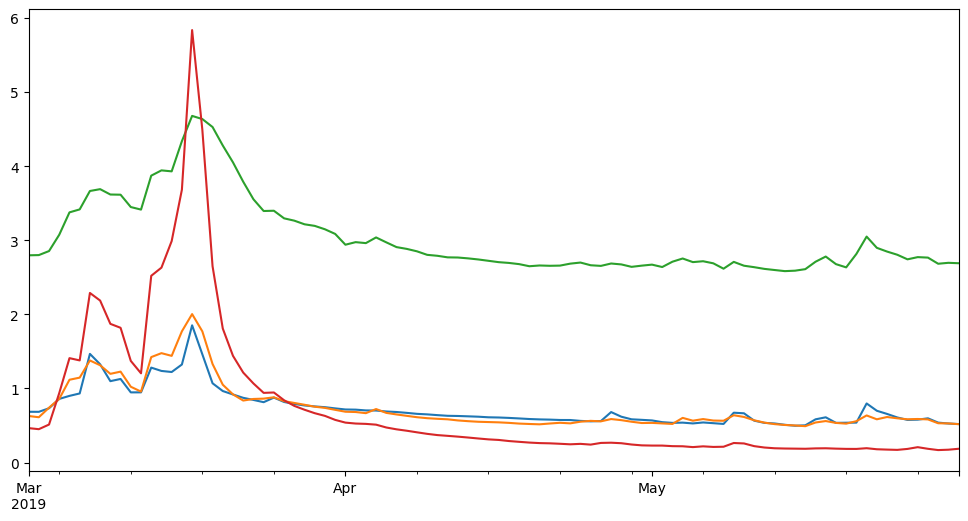

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

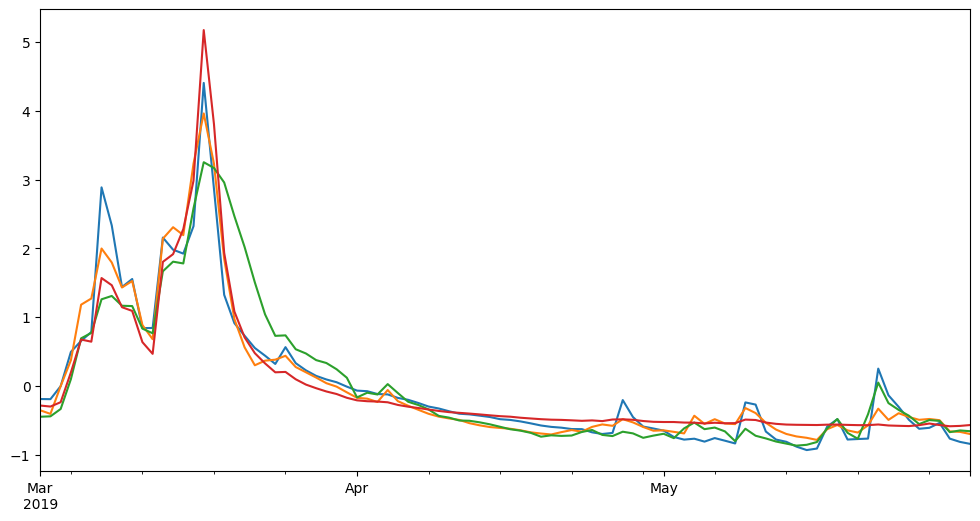

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

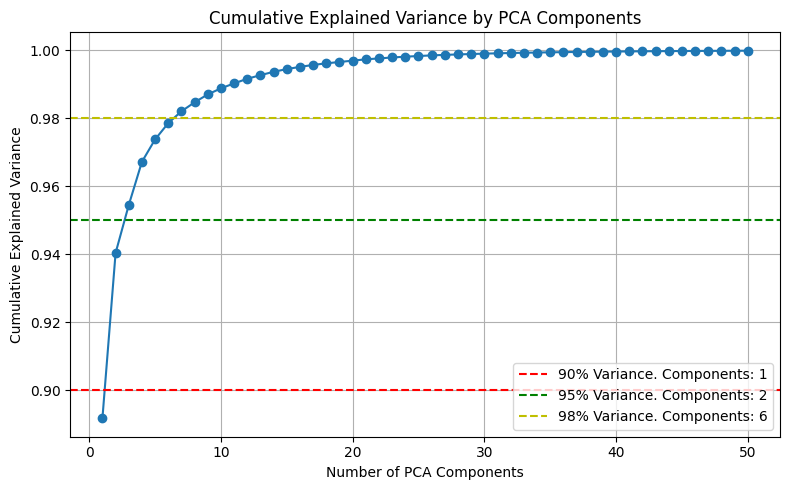

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -5.46291086,   0.09747176,   0.6299691 , ...,  -0.72708245,
         -0.20749228,   0.06045143],
       [ -6.13222142,   0.0354611 ,   0.5373614 , ...,  -0.66618786,
         -0.20804354,   0.03159211],
       [ -4.43937325,  -0.72244263,   0.96004062, ...,  -0.12938164,
         -0.28187745,  -0.13964009],
       ...,
       [-14.21738151,  -2.21763853,  -1.79325255, ...,   0.25529681,
          0.52994007,   0.14929476],
       [-13.88193745,  -2.44953912,  -1.87570041, ...,   0.36919728,
          0.47024738,   0.19285913],
       [-13.17503677,  -2.41504641,  -1.75024067, ...,   0.70856042,
          0.39933041,   0.21717997]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


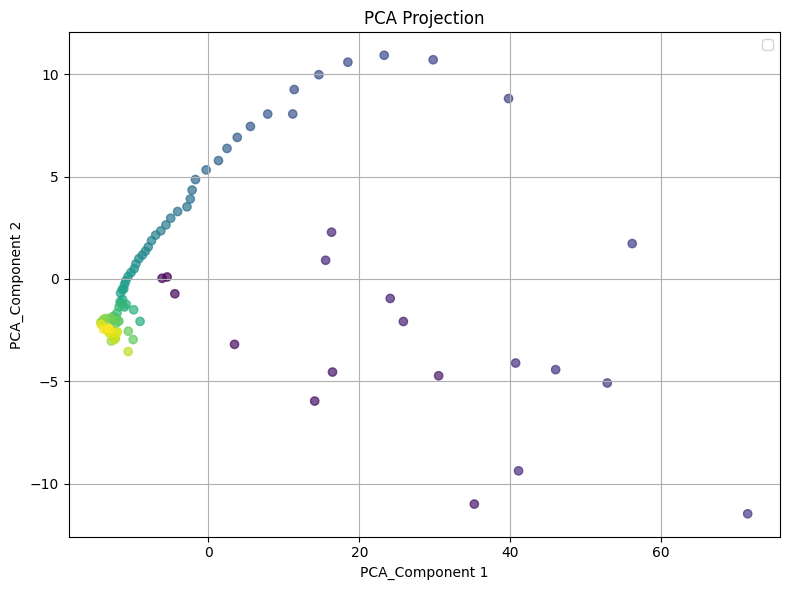

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


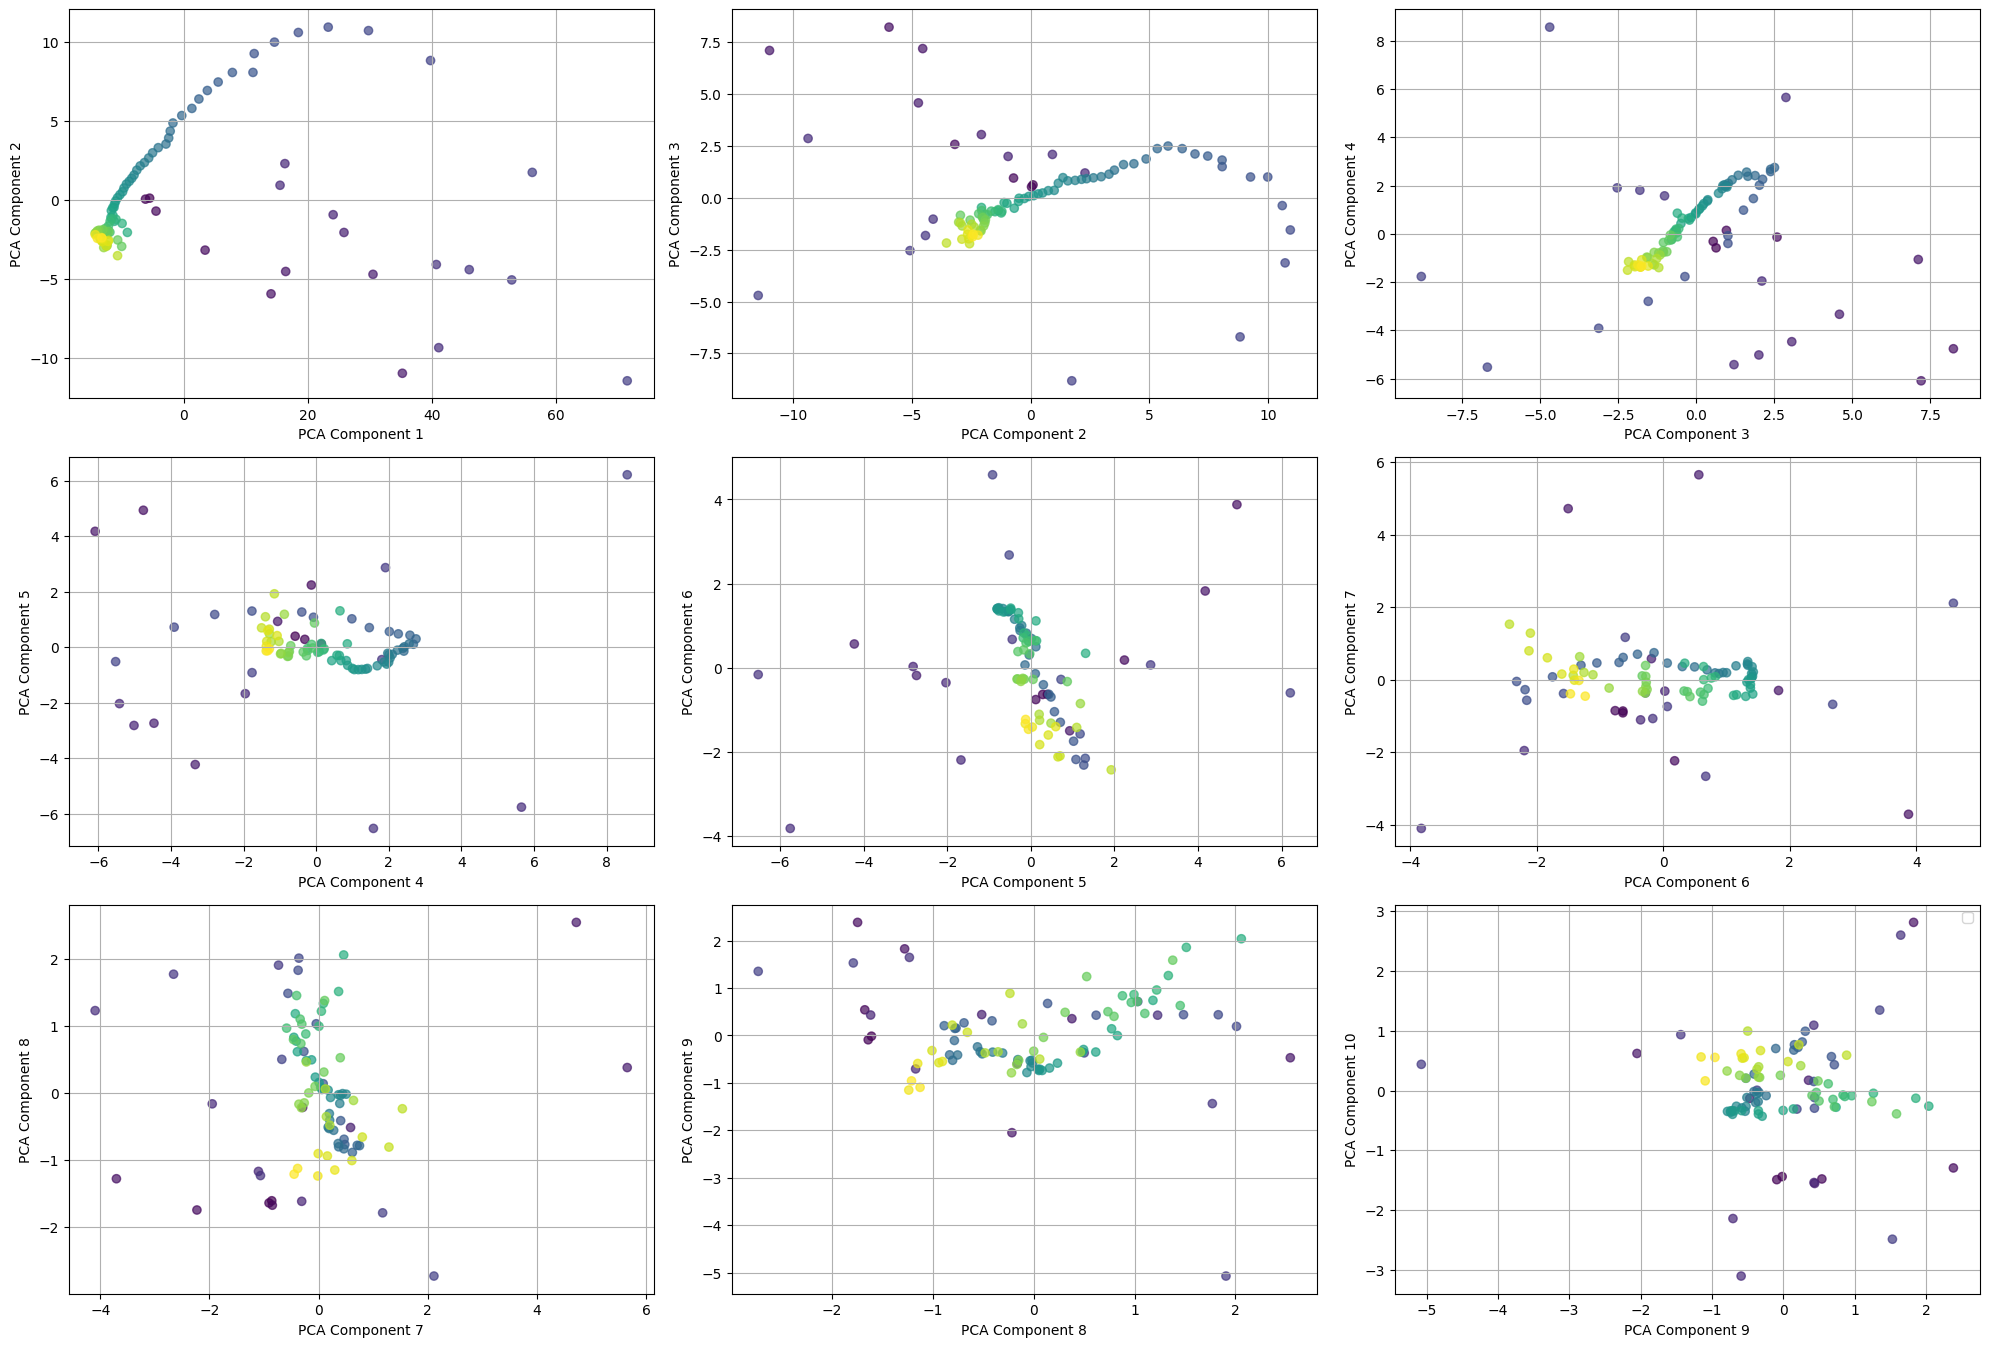

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42) #changed based on score
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.693
KMeans Davies-Bouldin Index is 0.595


<Axes: xlabel='k'>

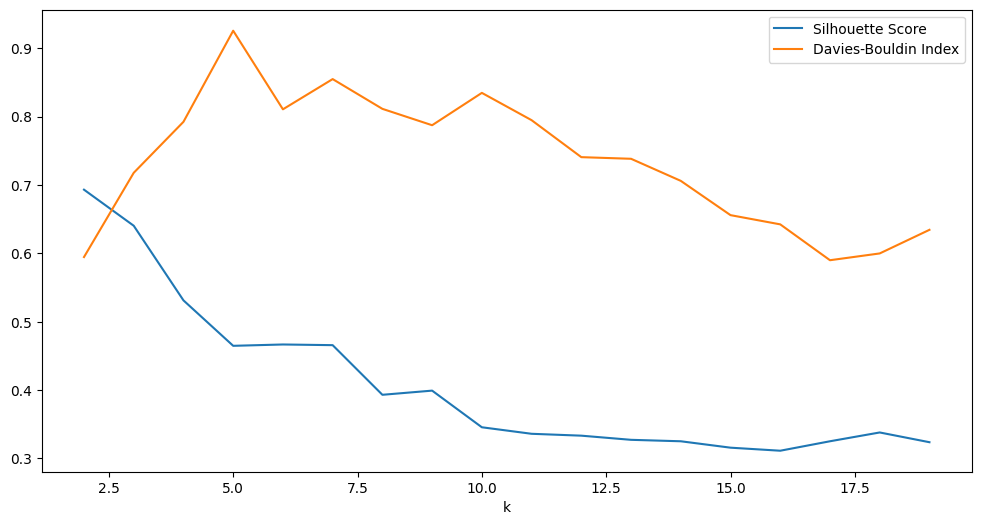

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     88               NaN   
1    0.76            3         4     73         -0.232330   
2    1.01            3         5     54         -0.119005   
3    1.27            3         5     44         -0.026356   
4    1.52            3         3     41          0.065412   
5    1.78            3         2     37          0.094088   
6    2.03            3         3     29          0.143566   
7    2.29            3         2     26          0.133201   
8    2.54            3         2     25          0.149601   
9    2.80            3         2     23          0.146318   
10   3.05            3         2     23          0.146318   
11   3.31            3         2     22          0.159483   
12   3.56            3         2     22          0.159483   
13   3.82            3         3     19          0.108949   
14   4.07            3         2     19          0.096570   
15   4.33            3         2     19          0.096570   
16   4.58            3         2     19          0.096570   
17   4.84            3         2     18          0.067517   
18   5.09            3         2     18          0.067517   
19   5.35            3         1     17               NaN   
20   5.60            3         1     17               NaN   
21   5.86            3         1     17               NaN   
22   6.11            3         1     17               NaN   
23   6.37            3         1     17               NaN   
24   6.62            3         1     17               NaN   
25   6.88            3         1     17               NaN   
26   7.13            3         1     16               NaN   
27   7.39            3         1     16               NaN   
28   7.64            3         1     16               NaN   
29   7.90            3         1     16               NaN   
30   8.15            3         1     16               NaN   
31   8.41            3         1     16               NaN   
32   8.66            3         1     16               NaN   
33   8.92            3         2     13          0.526050   
34   9.17            3         2     11          0.522064   
35   9.43            3         2     11          0.522064   
36   9.68            3         2     10          0.534777   
37   9.94            3         2     10          0.534777   
38  10.19            3         2     10          0.534777   
39  10.45            3         2     10          0.534777   
40  10.70            3         2     10          0.534777   
41  10.96            3         1     10               NaN   
42  11.21            3         2      7          0.598718   
43  11.47            3         2      6          0.603004   
44  11.72            3         2      5          0.597173   
45  11.98            3         2      4          0.589451   
46  12.23            3         2      4          0.589451   
47  12.49            3         2      2          0.614061   
48  12.74            3         2      2          0.614061   
49  13.00            3         2      2          0.614061   

    Davies-Bouldin Index  
0                    NaN  
1               1.212709  
2               1.395330  
3               1.137256  
4               1.018888  
5               0.953982  
6               1.035031  
7               0.974350  
8               0.952804  
9               0.995990  
10              0.995990  
11              0.979162  
12              0.979162  
13              1.043397  
14              1.212782  
15              1.212782  
16              1.212782  
17              1.319583  
18              1.319583  
19                   NaN  
20                   NaN  
21                   NaN  
22                   NaN  
23                   NaN  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

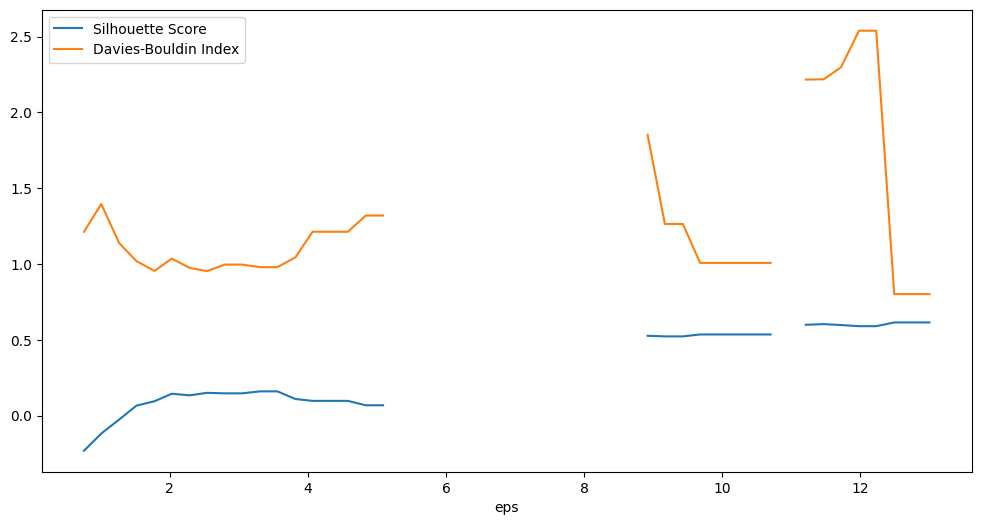

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

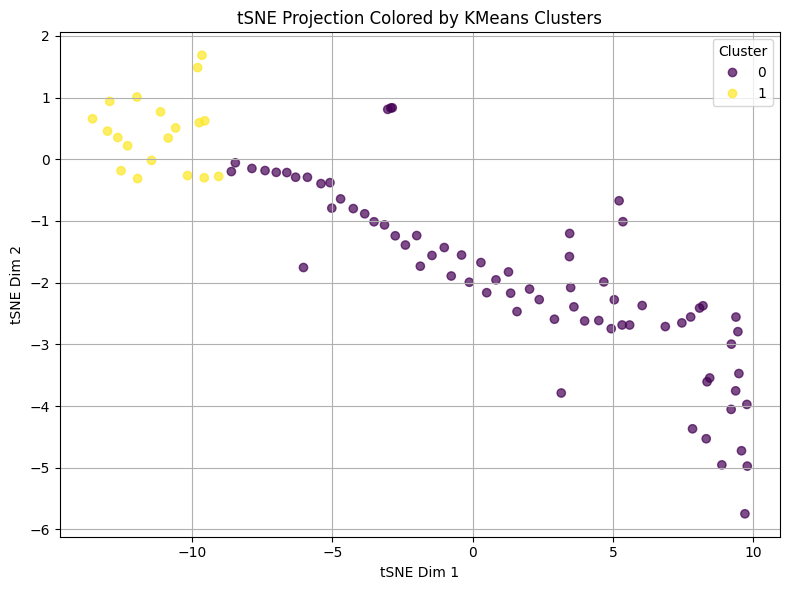

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         4    386          0.996598   
1    0.05            2         4    386          0.996598   
2    0.06            2         4    386          0.996598   
3    0.06            2         4    386          0.996598   
4    0.07            2         4    386          0.996598   
..    ...          ...       ...    ...               ...   
195  0.98            2        10     29         -0.116659   
196  0.99            2        10     28         -0.118223   
197  0.99            2        10     28         -0.118223   
198  1.00            2        10     28         -0.118223   
199  1.00            2        10     28         -0.118223   

     Davies-Bouldin Index  
0                0.005225  
1                0.005225  
2                0.005225  
3                0.005225  
4                0.005225  
..                    ...  
195              0.762816  
196              0.763979  
197              0.763979  
198              0.763979  
199              0.763979  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

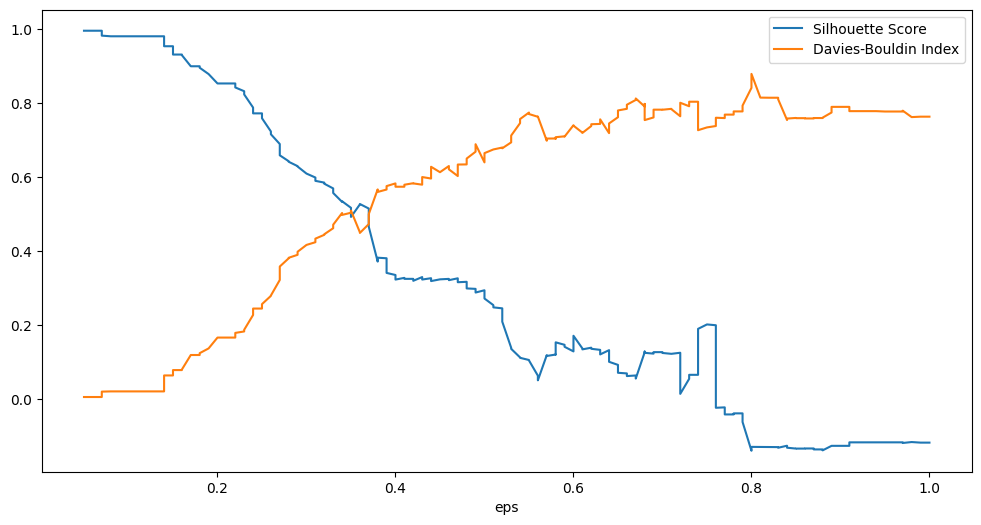

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2019
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2019-06-01 to 2019-08-31
Columns: 382 entries, 10000009 to 9000451
dtypes: float64(382)
memory usage: 275.3 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-06-01  0.576176  0.507457  0.189586  0.695280  0.427590  0.551752   
2019-06-02  0.560296  0.493888  0.186207  0.684902  0.415110  0.543105   
2019-06-03  0.565793  0.518384  0.198071  0.687761  0.440623  0.560782   
2019-06-04  0.563657  0.492672  0.189346  0.685028  0.421639  0.547628   
2019-06-05  0.584385  0.516201  0.200629  0.712248  0.466202  0.578504   
...              ...       ...       ...       ...       ...       ...   
2019-08-27  0.545979  0.449118  0.343037  0.777377  0.412402  0.541228   
2019-08-28  0.637934  0.924603  0.370965  0.891205  0.778259  0.794713   
2019-08-29  0.646606  0.944202  0.329834  0.854960  0.523344  0.618095   
2019-08-30  0.602683  0.800474  0.298434  0.840990  0.498704  0.601023   
2019-08-31  0.559871  0.671703  0.282931  0.807317  0.466448  0.578674   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2019-06-01  0.172587  0.166329  

          2019-06-01  2019-06-02  2019-06-03  2019-06-04  2019-06-05  \
10000009    0.128807    0.164890    0.233049    0.157251    0.250239   
10000010    0.039712    0.063995    0.144106    0.063985    0.131439   
10000011   -0.372406   -0.403477   -0.456818   -0.334548   -0.418395   
10000014    0.283225    0.354210    0.461869    0.316716    0.473019   
10000016   -0.063835   -0.055696   -0.001777   -0.029343    0.044323   
...              ...         ...         ...         ...         ...   
9000001     0.748350    0.904289    1.117640    0.773946    1.055829   
9000015     0.612461    0.746082    0.923987    0.638890    0.874704   
9000172    -0.012811   -0.067486   -0.013667   -0.050649    0.043653   
9000293    -0.507204   -0.568971   -0.579634   -0.501460   -0.571819   
9000451    -0.317203   -0.345882   -0.373098   -0.284635   -0.334890   

          2019-06-06  2019-06-07  2019-06-08  2019-06-09  2019-06-10  ...  \
10000009    0.193477    0.182618    0.221485    0.133334  

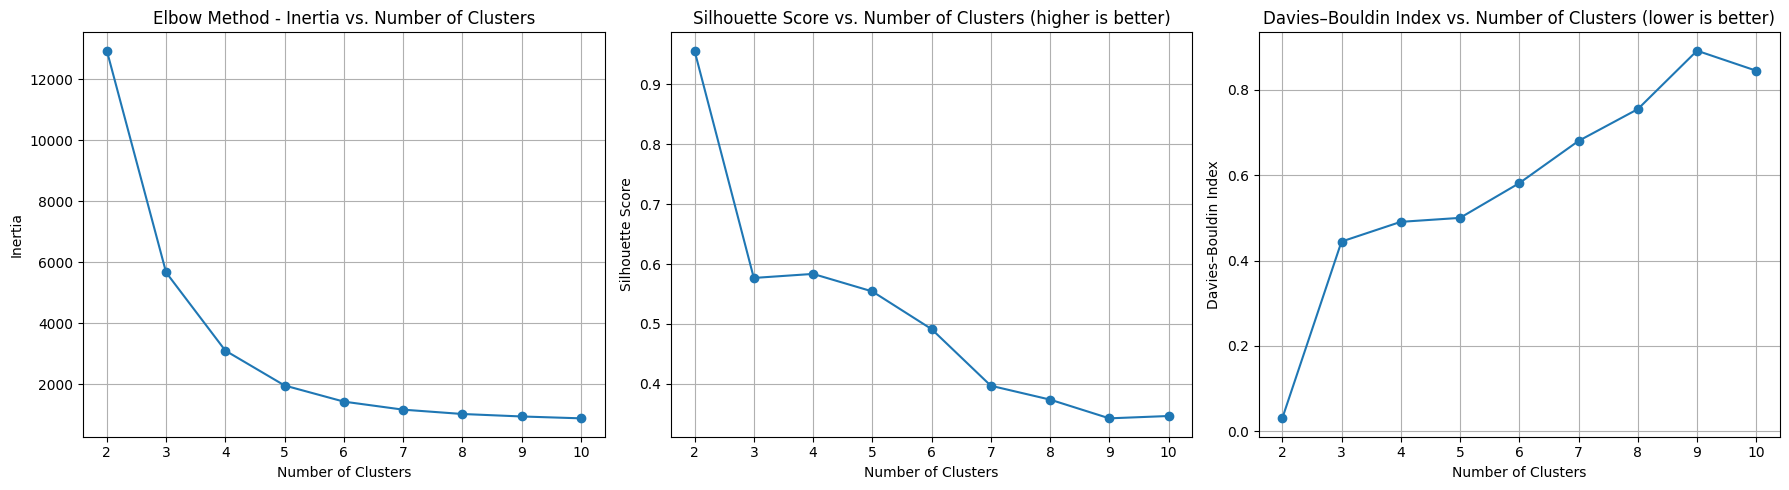

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        2
10000011        2
10000014        0
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-06-01  0.576176  0.507457  0.189586  0.695280  0.427590  0.551752   
2019-06-02  0.560296  0.493888  0.186207  0.684902  0.415110  0.543105   
2019-06-03  0.565793  0.518384  0.198071  0.687761  0.440623  0.560782   
2019-06-04  0.563657  0.492672  0.189346  0.685028  0.421639  0.547628   
2019-06-05  0.584385  0.516201  0.200629  0.712248  0.466202  0.578504   
...              ...       ...       ...       ...       ...       ...   
2019-08-27  0.545979  0.449118  0.343037  0.777377  0.412402  0.541228   
2019-08-28  0.637934  0.924603  0.370965  0.891205  0.778259  0.794713   
2019-08-29  0.646606  0.944202  0.329834  0.854960  0.523344  0.618095   
2019-08-30  0.602683  0.800474  0.298434  0.840990  0.498704  0.601023   
2019-08-31  0.559871  0.671703  0.282931  0.807317  0.466448  0.578674   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2019-06-01  0.172587  0.166329  

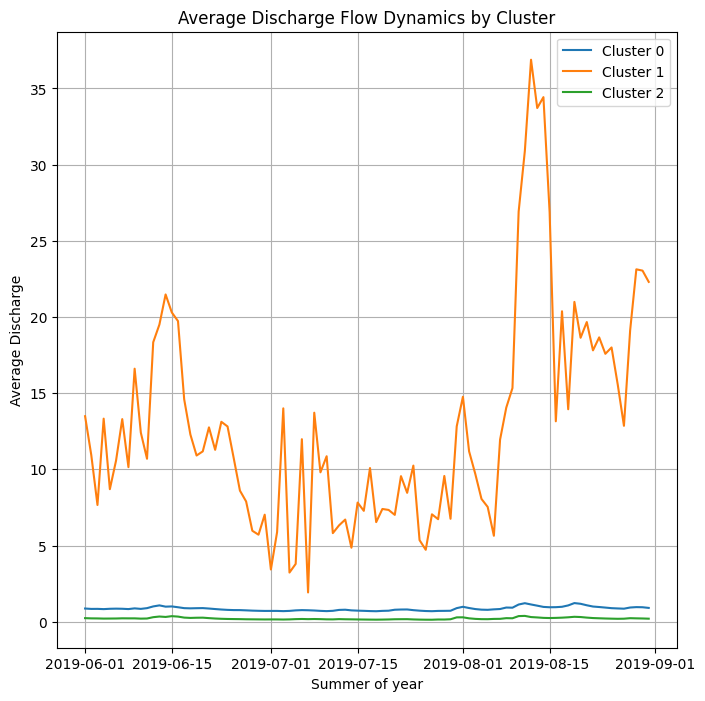

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2019-06-01  0.576176  0.507457  0.189586  0.695280  0.427590  0.551752   
2019-06-02  0.560296  0.493888  0.186207  0.684902  0.415110  0.543105   
2019-06-03  0.565793  0.518384  0.198071  0.687761  0.440623  0.560782   
2019-06-04  0.563657  0.492672  0.189346  0.685028  0.421639  0.547628   
2019-06-05  0.584385  0.516201  0.200629  0.712248  0.466202  0.578504   
...              ...       ...       ...       ...       ...       ...   
2019-08-27  0.545979  0.449118  0.343037  0.777377  0.412402  0.541228   
2019-08-28  0.637934  0.924603  0.370965  0.891205  0.778259  0.794713   
2019-08-29  0.646606  0.944202  0.329834  0.854960  0.523344  0.618095   
2019-08-30  0.602683  0.800474  0.298434  0.840990  0.498704  0.601023   
2019-08-31  0.559871  0.671703  0.282931  0.807317  0.466448  0.578674   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2019-06-01  0.172587  0.166329  0.535843  0.571913  ...  0.151334  0.292744   
2019-06-02  0.166527  0.160488  0.534447  0.555954  ...  0.125587  0.236663   
2019-06-03  0.164947  0.158965  0.535186  0.575173  ...  0.104652  0.187406   
2019-06-04  0.156138  0.150476  0.539296  0.633348  ...  0.090243  0.159663   
2019-06-05  0.177748  0.171302  0.541057  0.651738  ...  0.080152  0.128738   
...              ...       ...       ...       ...  ...       ...       ...   
2019-08-27  0.314675  0.303264  0.713883  0.715699  ...  0.002178  0.007963   
2019-08-28  0.576032  0.555144  0.714401  0.703428  ...  0.001336  0.008067   
2019-08-29  0.751465  0.724216  0.710701  0.735146  ...  0.011321  0.011846   
2019-08-30  1.028828  0.991521  0.699152  0.762704  ...  0.004537  0.011843   
2019-08-31  0.612443  0.590235  0.690923  0.747404  ...  0.002136  0.011406   

             7000003   7000333   8000001   9000001   9000015   9000172  \
2019-06-01  0.319725  0.412099  0.475412  1.054035  0.949223  0.466945   
2019-06-02  0.304038  0.398976  0.454263  1.046955  0.942826  0.407350   
2019-06-03  0.303297  0.416017  0.452896  1.037308  0.934085  0.434285   
2019-06-04  0.279573  0.393214  0.435818  1.033028  0.930236  0.405423   
2019-06-05  0.267432  0.422776  0.442133  1.046746  0.942791  0.465817   
...              ...       ...       ...       ...       ...       ...   
2019-08-27  0.295238  0.703704  1.009126  1.580434  1.414747  0.675336   
2019-08-28  0.643031  0.883456  0.960725  1.585241  1.418932  0.764760   
2019-08-29  0.660301  0.871907  0.984860  1.628138  1.457533  0.761408   
2019-08-30  0.619090  0.843859  0.966253  1.720470  1.540798  0.768989   
2019-08-31  0.566497  0.792824  0.886961  1.729345  1.548627  0.749684   

             9000293   9000451  
2019-06-01  0.085616  0.232165  
2019-06-02  0.077281  0.224115  
2019-06-03  0.132607  0.242697  
2019-06-04  0.062307  0.227335  
2019-06-05  0.112573  0.248556  
...              ...       ...  
2019-08-27  0.162156  0.872115  
2019-08-28  0.155073  0.853047  
2019-08-29  0.306334  0.869726  
2019-08-30  0.221499  0.887122  
2019-08-31  0.185264  0.850627  

[92 rows x 382 columns]

<Axes: >

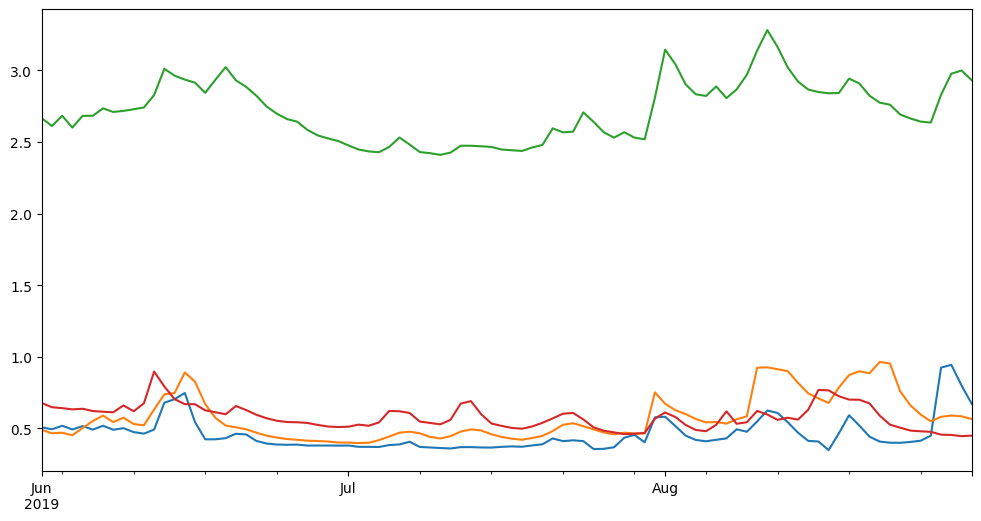

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

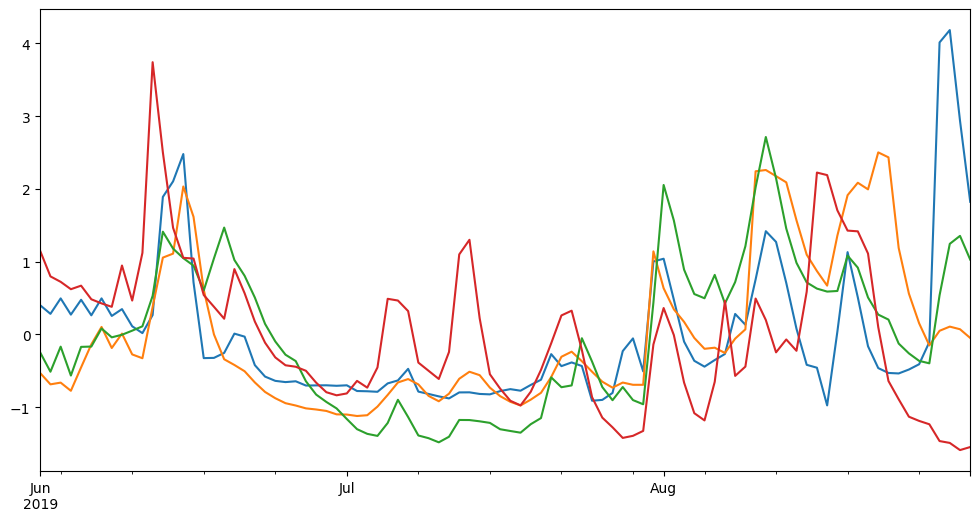

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

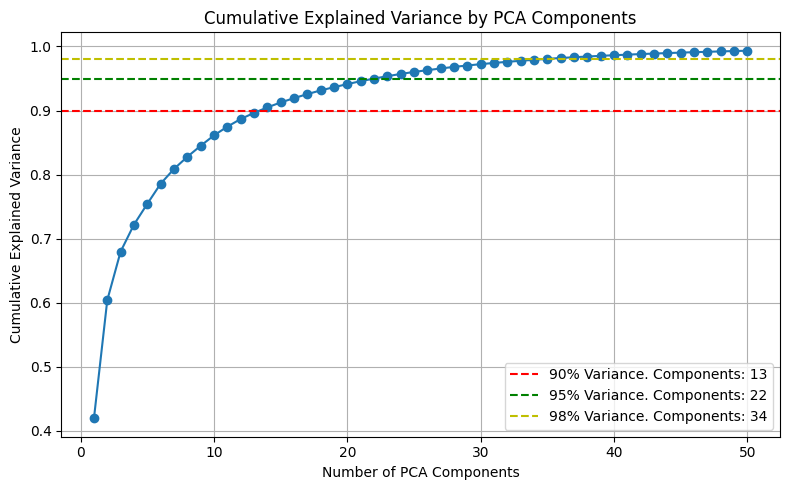

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  9.68171847,  10.01825383,  -3.78655862, ...,   1.29536467,
         -3.58047976,   0.35602511],
       [  5.79996556,   8.86220433,  -3.68109812, ...,   0.8168555 ,
         -2.68760149,  -0.45697898],
       [  4.77490356,   7.77248823,  -3.57179824, ...,   0.60263154,
         -1.68922786,  -0.24446677],
       ...,
       [  3.77788302,  -8.16599013,  -8.81767246, ...,  -1.73505595,
         -1.96021265,   1.63238122],
       [  2.03216015,  -8.72488176, -10.01198037, ...,  -2.30681595,
         -1.5110802 ,   2.83377313],
       [ -0.92299616,  -7.53951264,  -8.8845685 , ...,  -1.85294816,
         -0.8783834 ,   1.65207694]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


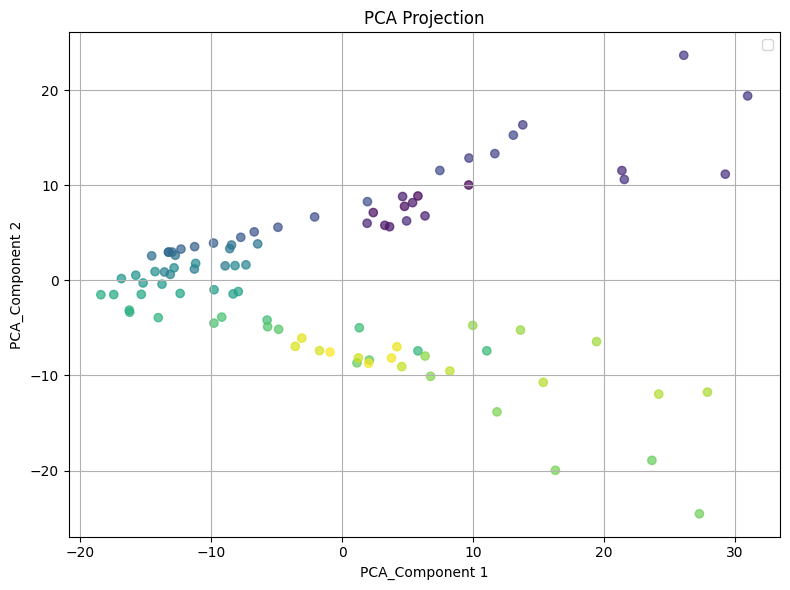

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


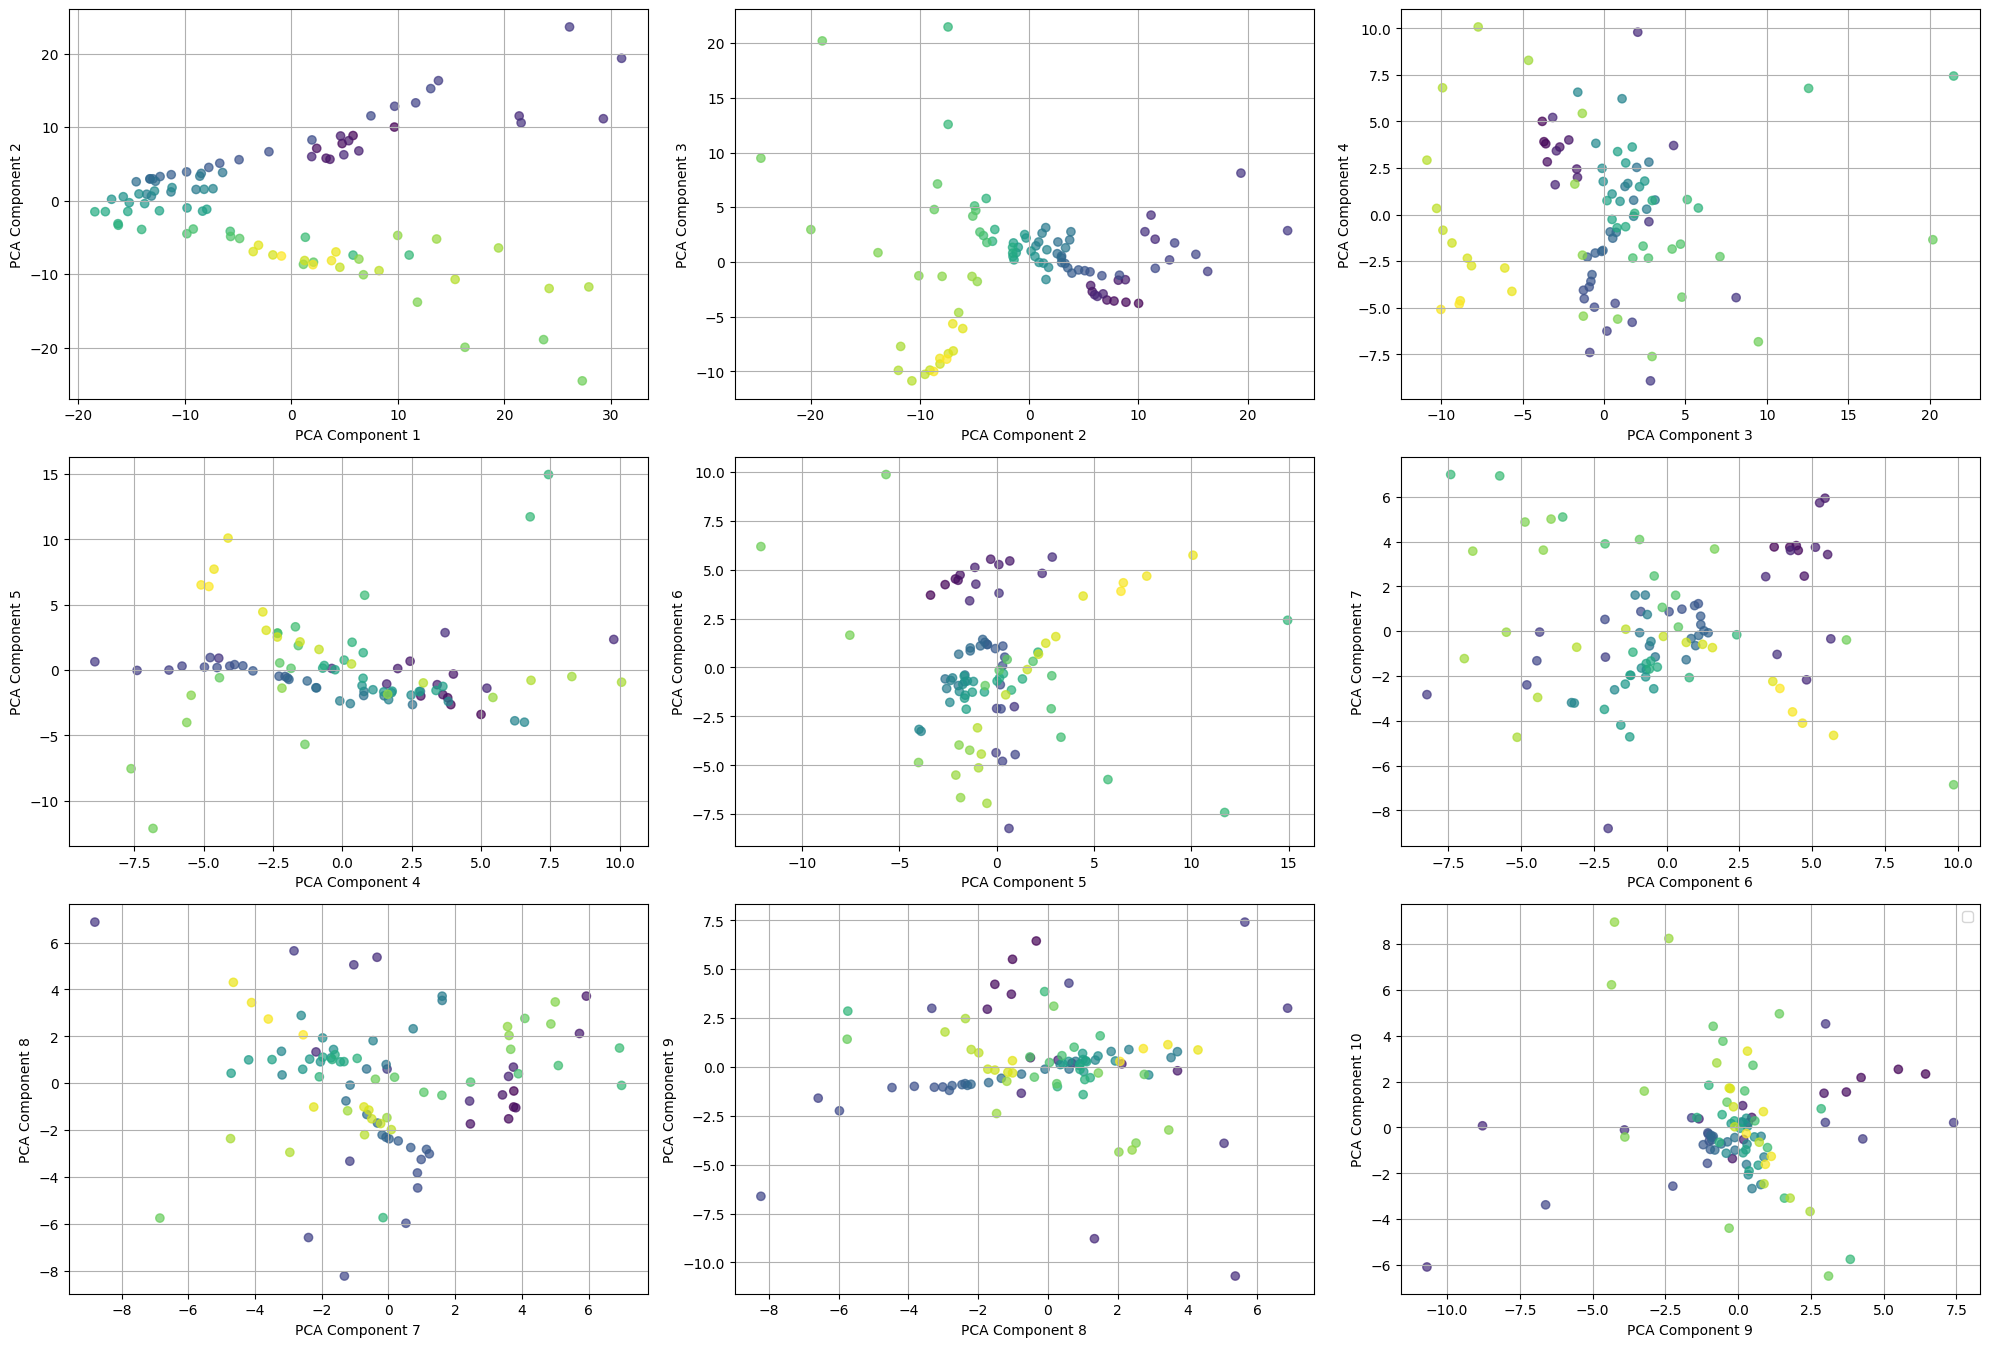

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.337
KMeans Davies-Bouldin Index is 1.449


<Axes: xlabel='k'>

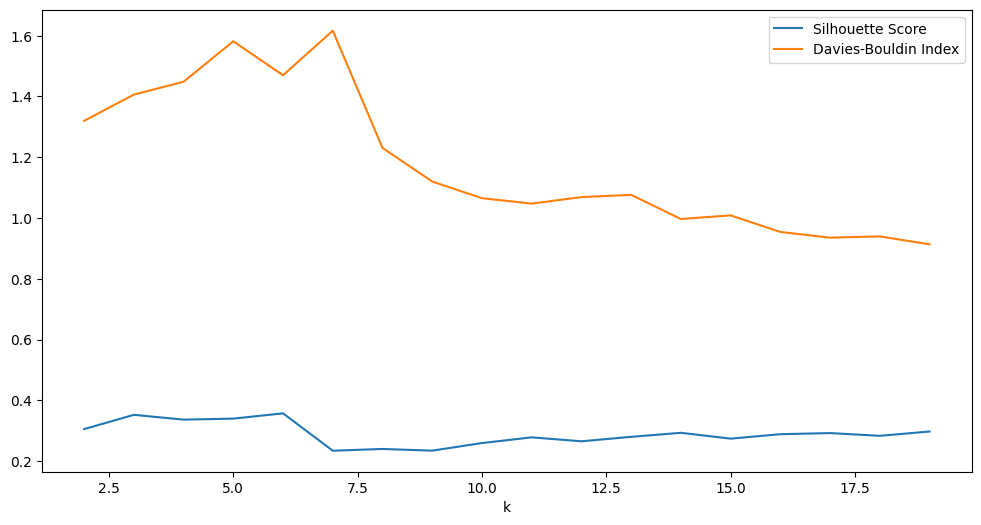

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         1     89               NaN   
5    1.78            3         1     87               NaN   
6    2.03            3         1     85               NaN   
7    2.29            3         2     82         -0.118587   
8    2.54            3         3     78         -0.154992   
9    2.80            3         5     70         -0.074661   
10   3.05            3         6     67         -0.099602   
11   3.31            3         6     62         -0.059517   
12   3.56            3         6     61         -0.053997   
13   3.82            3         7     56         -0.059111   
14   4.07            3         7     55         -0.049773   
15   4.33            3         6     55         -0.034682   
16   4.58            3         8     46          0.051271   
17   4.84            3         9     40          0.110450   
18   5.09            3         8     37          0.115137   
19   5.35            3         8     37          0.115137   
20   5.60            3         7     36          0.131430   
21   5.86            3         7     36          0.131430   
22   6.11            3         6     31          0.171167   
23   6.37            3         6     30          0.181816   
24   6.62            3         6     30          0.181816   
25   6.88            3         6     30          0.181816   
26   7.13            3         5     28          0.176573   
27   7.39            3         5     28          0.176573   
28   7.64            3         5     28          0.176573   
29   7.90            3         5     28          0.176573   
30   8.15            3         5     27          0.166418   
31   8.41            3         5     27          0.166418   
32   8.66            3         5     26          0.163211   
33   8.92            3         5     26          0.163211   
34   9.17            3         6     23          0.173683   
35   9.43            3         6     23          0.173683   
36   9.68            3         5     22          0.275095   
37   9.94            3         4     19          0.253818   
38  10.19            3         4     16          0.245518   
39  10.45            3         4     16          0.245518   
40  10.70            3         4     16          0.245518   
41  10.96            3         3     16          0.223401   
42  11.21            3         3     14          0.249206   
43  11.47            3         3     13          0.245429   
44  11.72            3         3     10          0.263280   
45  11.98            3         3     10          0.263280   
46  12.23            3         3     10          0.263280   
47  12.49            3         3     10          0.263280   
48  12.74            3         3     10          0.263280   
49  13.00            3         2     10          0.245320   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7               1.211120  
8               1.420245  
9               1.262518  
10              1.314570  
11              1.365009  
12              1.350059  
13              1.385589  
14              1.405245  
15              1.450952  
16              1.262834  
17              1.250736  
18              1.319768  
19              1.319768  
20              1.365470  
21              1.365470  
22              1.402623  
23              1.399700  
24              1.399700  
25              1.399700  
26              1.326154  
27              1.326154  
28              1.326154  
29              1.326154  
30              1.321983  
31              1.321983  
32 

<Axes: xlabel='eps'>

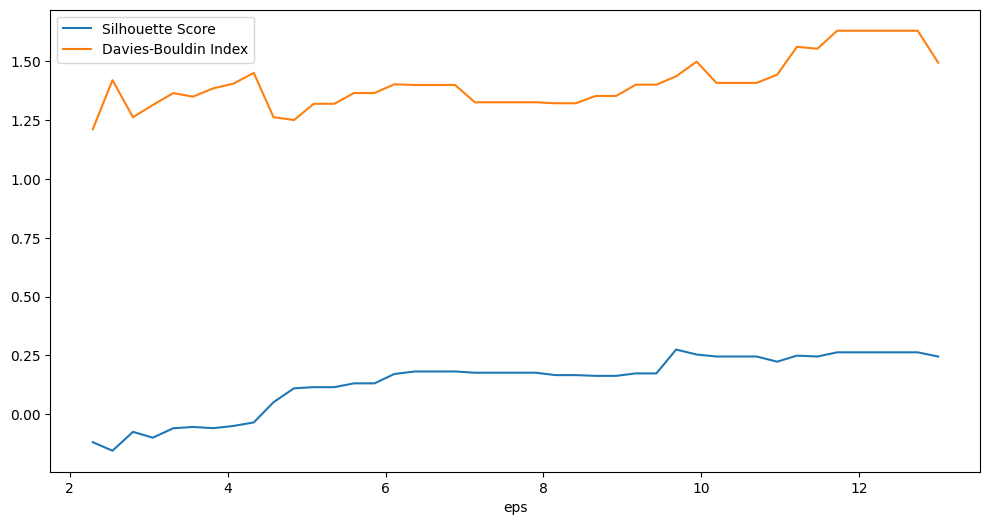

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

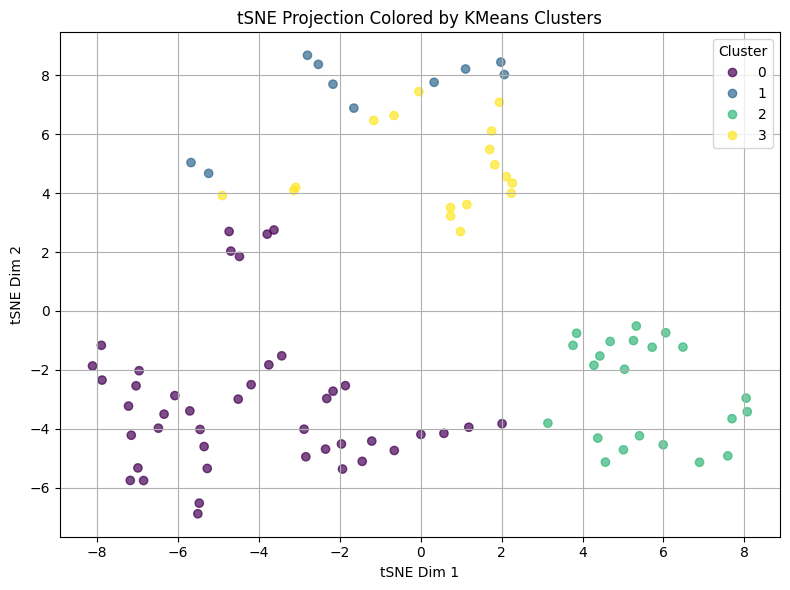

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         8    366          0.971722   
1    0.05            2         8    366          0.971722   
2    0.06            2         8    366          0.971722   
3    0.06            2         9    364          0.918457   
4    0.07            2         9    364          0.918457   
..    ...          ...       ...    ...               ...   
195  0.98            2         3     36         -0.058483   
196  0.99            2         3     36         -0.058483   
197  0.99            2         3     36         -0.058483   
198  1.00            2         3     36         -0.058483   
199  1.00            2         3     35         -0.064013   

     Davies-Bouldin Index  
0                0.031950  
1                0.031950  
2                0.031950  
3                0.093796  
4                0.093796  
..                    ...  
195              1.030452  
196              1.030452  
197              1.030452  
198              1.030452  
199              1.047860  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

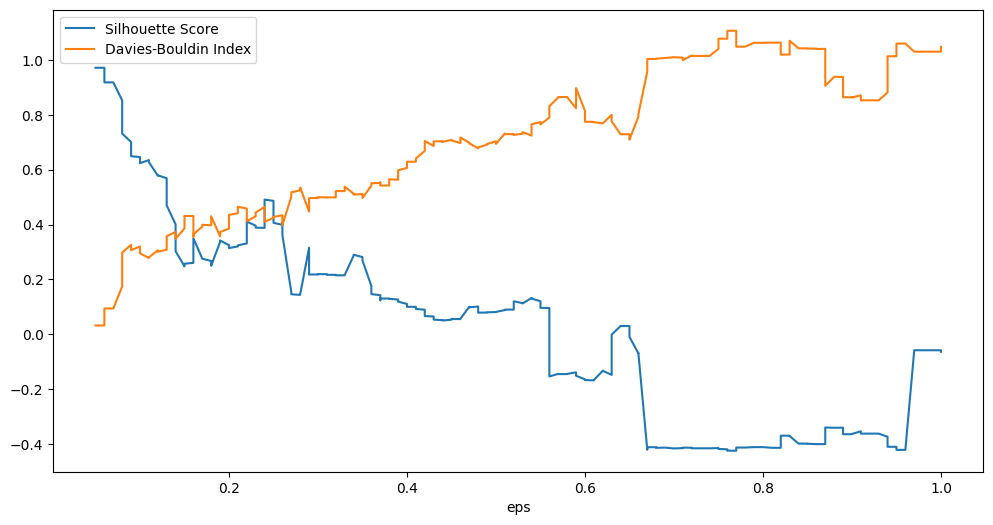

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2019
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2019-09-01 to 2019-11-30
Columns: 389 entries, 10000009 to 9000451
dtypes: float64(389)
memory usage: 277.3 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-09-01  0.569997  0.689677  0.283625  0.817530  0.520470  0.616103   
2019-09-02  0.581783  0.685257  0.311267  0.822334  0.483328  0.590370   
2019-09-03  0.602129  0.679680  0.297425  0.828413  0.516177  0.613129   
2019-09-04  0.835121  0.751201  0.503738  0.934295  0.709902  0.747352   
2019-09-05  1.541762  0.940035  1.142885  1.214666  0.845572  0.841352   
...              ...       ...       ...       ...       ...       ...   
2019-11-26  1.199823  0.962807  1.181278  1.141370  0.821036  0.824351   
2019-11-27  1.681952  1.137254  1.352602  1.356468  0.908076  0.884658   
2019-11-28  2.046277  1.452233  2.361165  1.669691  1.298853  1.155409   
2019-11-29  2.502246  1.390835  1.903075  1.626916  0.971597  0.928669   
2019-11-30  1.840056  1.090585  1.384632  1.320280  0.763507  0.784493   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-09-01  0.629477  0.606651  

          2019-09-01  2019-09-02  2019-09-03  2019-09-04  2019-09-05  \
10000009    0.087156    0.071960    0.045777    0.180293    0.427549   
10000010    0.241583    0.166456    0.114823    0.106895    0.061065   
10000011   -0.282360   -0.175086   -0.225511   -0.109543    0.184612   
10000014    0.406555    0.291640    0.247244    0.267033    0.228330   
10000016    0.023248   -0.017953   -0.030749    0.070773    0.003532   
...              ...         ...         ...         ...         ...   
9000015     1.425775    1.048594    1.138537    1.320947    0.937559   
9000172     0.356207    0.234149    0.261820    0.386365    0.263807   
9000173    -0.371618   -0.285091   -0.286353   -0.320751   -0.395453   
9000293    -0.287020   -0.278710   -0.111904    0.698164    0.559012   
9000451     0.498636    0.340005    0.328631    0.796441    0.584558   

          2019-09-06  2019-09-07  2019-09-08  2019-09-09  2019-09-10  ...  \
10000009    0.702729    0.157125    0.158390    0.083819  

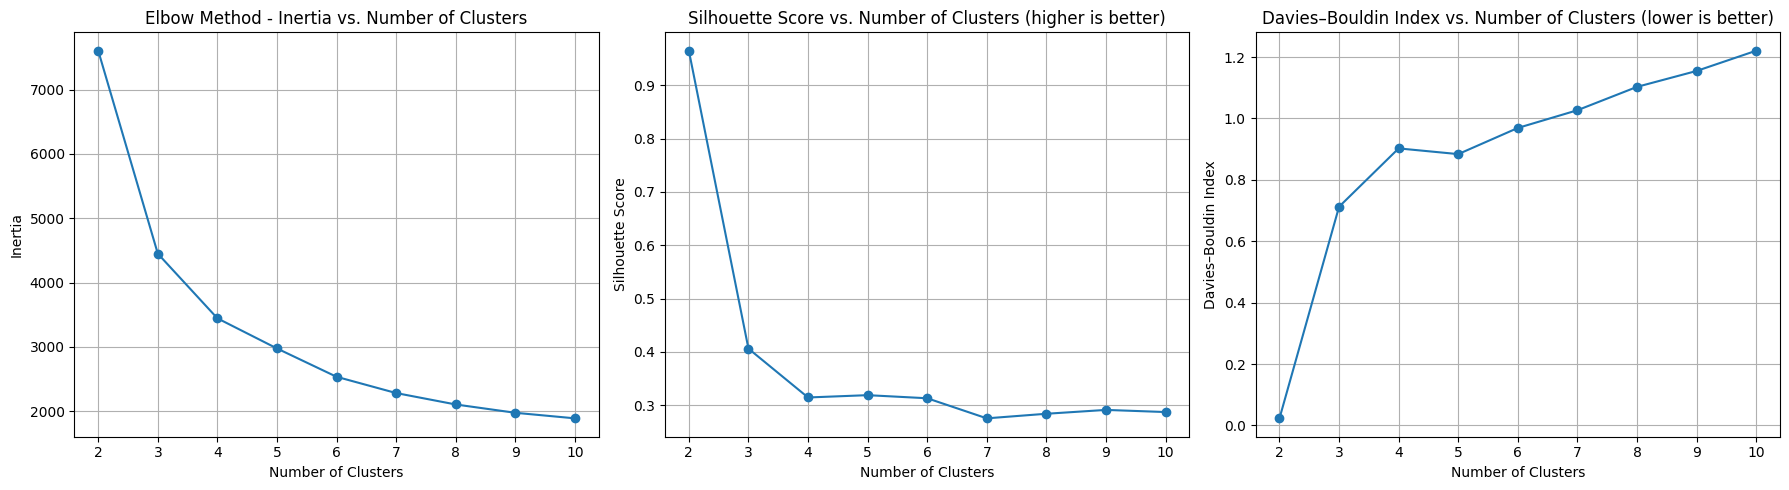

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-09-01  0.569997  0.689677  0.283625  0.817530  0.520470  0.616103   
2019-09-02  0.581783  0.685257  0.311267  0.822334  0.483328  0.590370   
2019-09-03  0.602129  0.679680  0.297425  0.828413  0.516177  0.613129   
2019-09-04  0.835121  0.751201  0.503738  0.934295  0.709902  0.747352   
2019-09-05  1.541762  0.940035  1.142885  1.214666  0.845572  0.841352   
...              ...       ...       ...       ...       ...       ...   
2019-11-26  1.199823  0.962807  1.181278  1.141370  0.821036  0.824351   
2019-11-27  1.681952  1.137254  1.352602  1.356468  0.908076  0.884658   
2019-11-28  2.046277  1.452233  2.361165  1.669691  1.298853  1.155409   
2019-11-29  2.502246  1.390835  1.903075  1.626916  0.971597  0.928669   
2019-11-30  1.840056  1.090585  1.384632  1.320280  0.763507  0.784493   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-09-01  0.629477  0.606651  

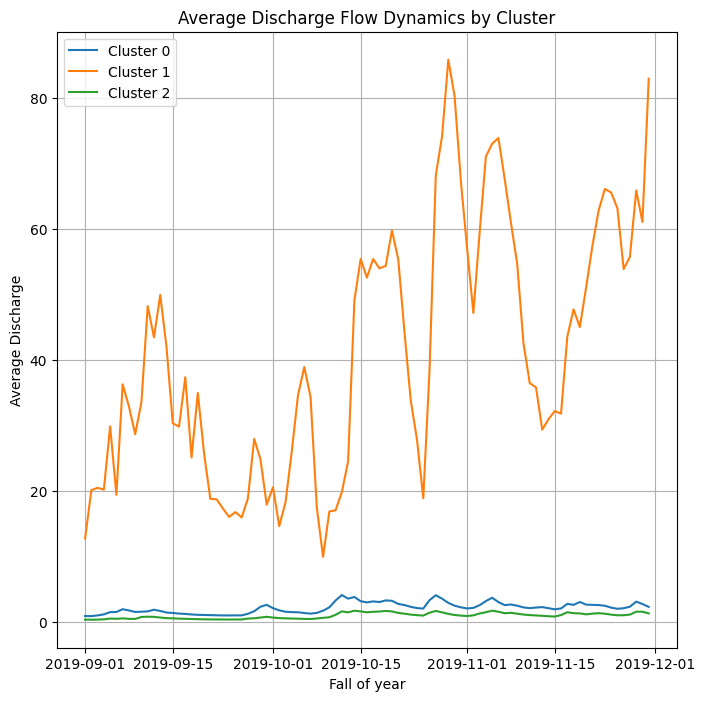

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2019-09-01  0.569997  0.689677  0.283625  0.817530  0.520470  0.616103   
2019-09-02  0.581783  0.685257  0.311267  0.822334  0.483328  0.590370   
2019-09-03  0.602129  0.679680  0.297425  0.828413  0.516177  0.613129   
2019-09-04  0.835121  0.751201  0.503738  0.934295  0.709902  0.747352   
2019-09-05  1.541762  0.940035  1.142885  1.214666  0.845572  0.841352   
...              ...       ...       ...       ...       ...       ...   
2019-11-26  1.199823  0.962807  1.181278  1.141370  0.821036  0.824351   
2019-11-27  1.681952  1.137254  1.352602  1.356468  0.908076  0.884658   
2019-11-28  2.046277  1.452233  2.361165  1.669691  1.298853  1.155409   
2019-11-29  2.502246  1.390835  1.903075  1.626916  0.971597  0.928669   
2019-11-30  1.840056  1.090585  1.384632  1.320280  0.763507  0.784493   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-09-01  0.629477  0.606651  0.693827  0.798212  ...  0.011344  0.565291   
2019-09-02  0.545804  0.526012  0.689122  0.803422  ...  0.010585  0.584913   
2019-09-03  0.485118  0.467527  0.712696  1.038830  ...  0.014321  0.630598   
2019-09-04  0.678382  0.653783  0.785482  1.622074  ...  0.013955  0.749346   
2019-09-05  1.804904  1.739456  0.872718  2.246255  ...  0.009306  1.147229   
...              ...       ...       ...       ...  ...       ...       ...   
2019-11-26  1.974251  1.902662  2.614097  2.546070  ...  1.000702  1.951082   
2019-11-27  3.315446  3.195224  2.612504  3.026869  ...  0.977262  2.135460   
2019-11-28  6.848671  6.600329  2.690255  3.849734  ...  1.078094  2.549562   
2019-11-29  8.617443  8.304965  2.761372  3.655702  ...  1.279024  2.707090   
2019-11-30  3.844804  3.705387  2.783342  3.226072  ...  1.260930  2.562288   

             7000333   8000001   9000001   9000015   9000172   9000173  \
2019-09-01  0.785779  1.040655  1.794621  1.607418  0.778510  0.214451   
2019-09-02  0.770361  1.041589  1.843308  1.651202  0.759382  0.190811   
2019-09-03  0.816272  0.969731  2.040792  1.829491  0.844783  0.229088   
2019-09-04  1.001923  1.056611  2.383580  2.139283  1.070733  0.262254   
2019-09-05  1.323793  1.850596  2.649052  2.379141  1.272916  0.190483   
...              ...       ...       ...       ...       ...       ...   
2019-11-26  1.520647  2.532096  3.285906  2.931024  1.670346  3.264569   
2019-11-27  1.736092  2.600905  3.692066  3.297501  2.252148  3.005547   
2019-11-28  2.436656  3.221872  4.458539  3.989980  3.286319  2.631739   
2019-11-29  2.199553  3.418535  4.447859  3.979767  3.013284  2.757832   
2019-11-30  1.610011  3.069917  4.115551  3.678833  1.761380  2.374898   

             9000293   9000451  
2019-09-01  0.280014  0.888892  
2019-09-02  0.197799  0.875295  
2019-09-03  0.425026  0.919824  
2019-09-04  1.427227  1.539592  
2019-09-05  1.757610  1.799553  
...              ...       ...  
2019-11-26  3.121372  1.681900  
2019-11-27  3.814189  2.347901  
2019-11-28  5.497713  3.181950  
2019-11-29  4.034589  3.498944  
2019-11-30  3.246579  3.202472  

[91 rows x 389 columns]

<Axes: >

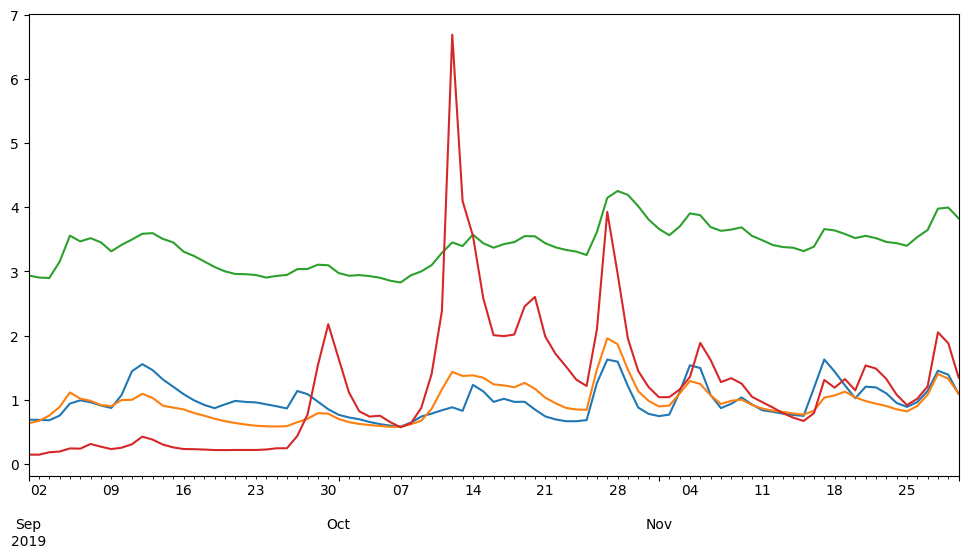

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

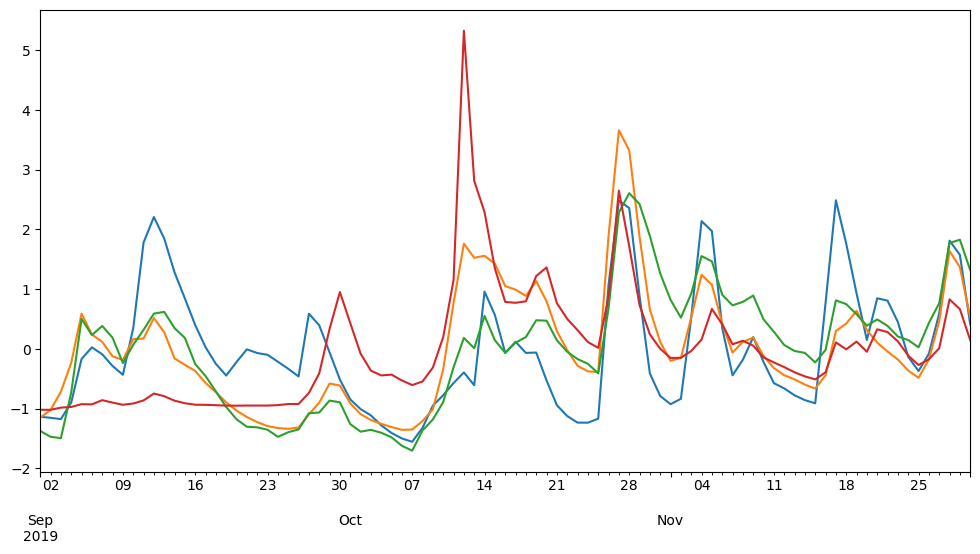

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

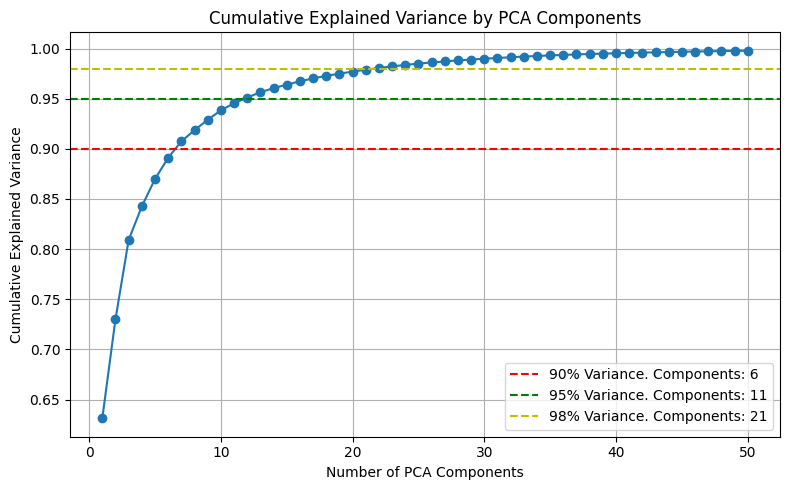

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-23.66380046,   1.37105006,  -0.15078618, ...,   0.65011431,
          0.0990257 ,  -1.17026189],
       [-24.25307269,   0.84799723,  -0.64667511, ...,   0.5808961 ,
          0.74616741,  -0.78212687],
       [-23.08984952,   0.92887678,   0.56267634, ...,   0.7417241 ,
          0.76331663,  -0.94688323],
       ...,
       [ 21.91427684,  -8.25512775,   8.56694896, ...,  -1.78507636,
         -0.47225022,   1.85601165],
       [ 20.40892678,  -9.00324867,  -0.08674328, ...,  -1.89437036,
          0.90985785,  -0.30916705],
       [ 12.58530356,  -7.46133664,  -5.24721071, ...,  -1.24238548,
          0.27697718,  -1.23635419]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


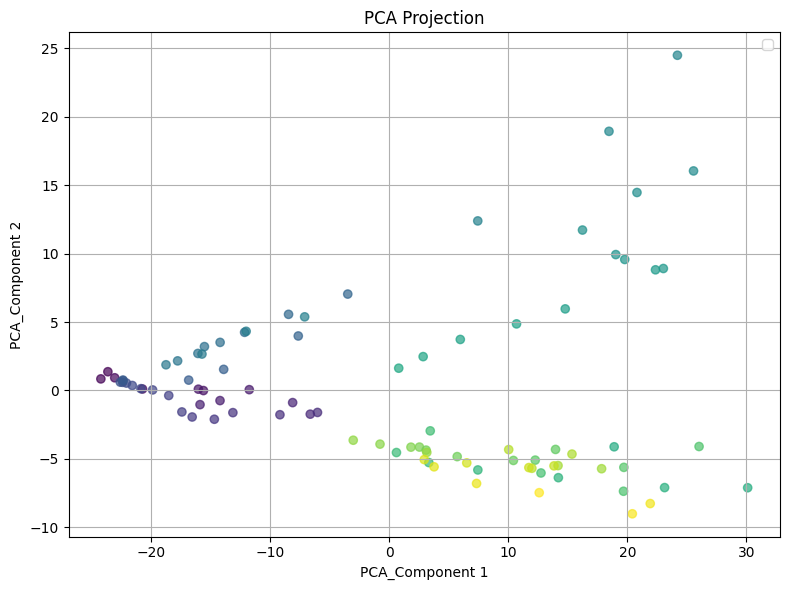

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


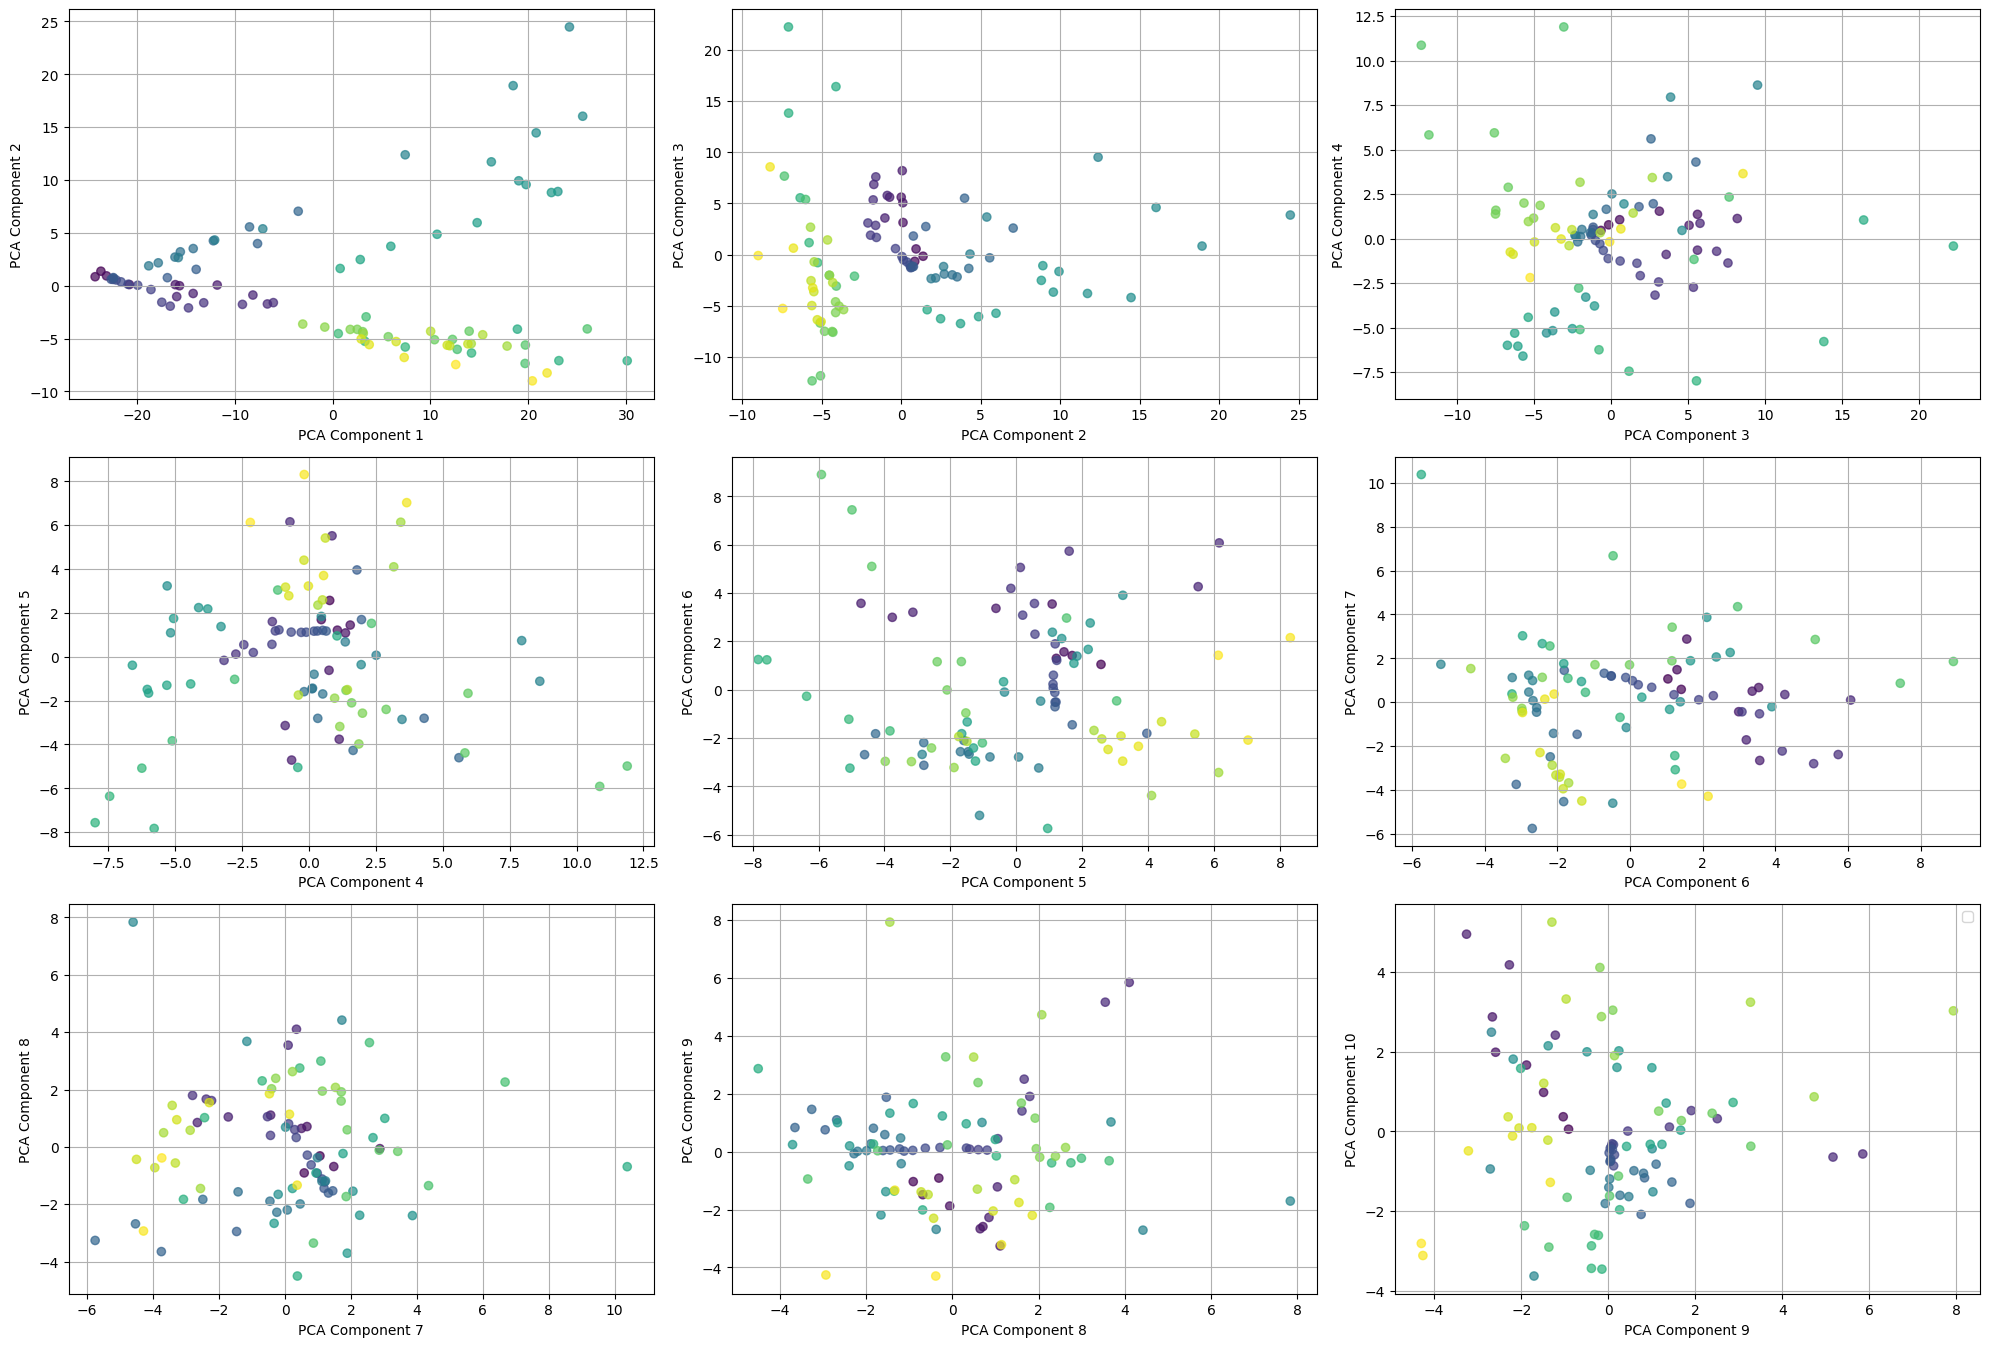

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.305
KMeans Davies-Bouldin Index is 1.401


<Axes: xlabel='k'>

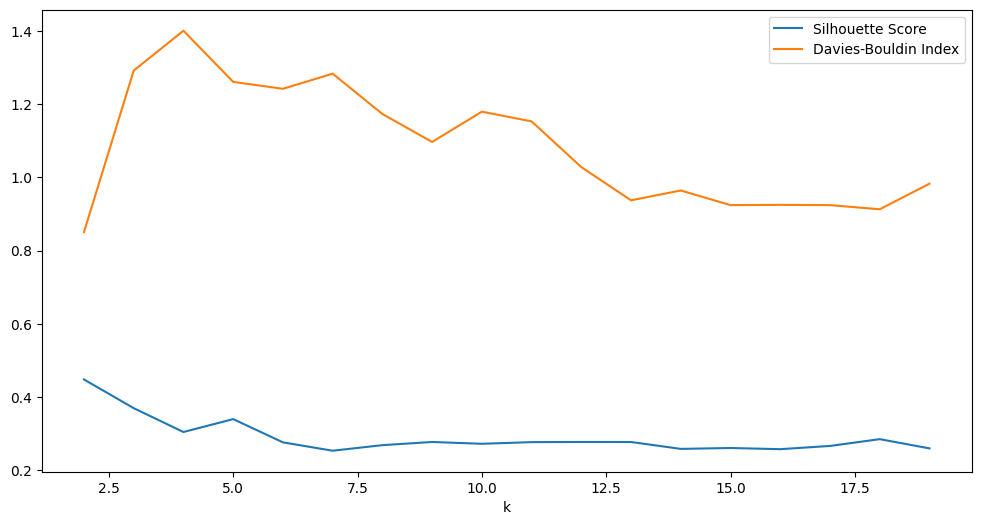

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         1     87               NaN   
2    1.01            3         1     85               NaN   
3    1.27            3         1     84               NaN   
4    1.52            3         1     84               NaN   
5    1.78            3         1     83               NaN   
6    2.03            3         1     82               NaN   
7    2.29            3         2     77          0.060049   
8    2.54            3         3     72          0.104965   
9    2.80            3         3     71          0.105020   
10   3.05            3         3     70          0.103253   
11   3.31            3         3     69          0.106110   
12   3.56            3         4     65         -0.080044   
13   3.82            3         5     61         -0.071874   
14   4.07            3         5     61         -0.071874   
15   4.33            3         5     61         -0.071874   
16   4.58            3         6     54         -0.035324   
17   4.84            3         6     54         -0.035324   
18   5.09            3         6     51         -0.029316   
19   5.35            3         7     45          0.014461   
20   5.60            3         7     39          0.031065   
21   5.86            3         8     35          0.039828   
22   6.11            3         8     33          0.045626   
23   6.37            3         7     30          0.084348   
24   6.62            3         7     29          0.096873   
25   6.88            3         6     27          0.238767   
26   7.13            3         6     27          0.238767   
27   7.39            3         6     26          0.242094   
28   7.64            3         6     25          0.246377   
29   7.90            3         5     22          0.245325   
30   8.15            3         5     22          0.245325   
31   8.41            3         4     21          0.262819   
32   8.66            3         4     19          0.283270   
33   8.92            3         3     17          0.355662   
34   9.17            3         3     15          0.368648   
35   9.43            3         3     13          0.378448   
36   9.68            3         3     13          0.378448   
37   9.94            3         2     13          0.379544   
38  10.19            3         2     13          0.379544   
39  10.45            3         2     12          0.384049   
40  10.70            3         2     11          0.389189   
41  10.96            3         2     11          0.389189   
42  11.21            3         2     11          0.389189   
43  11.47            3         2     11          0.389189   
44  11.72            3         2     11          0.389189   
45  11.98            3         2     11          0.389189   
46  12.23            3         2      9          0.398040   
47  12.49            3         2      9          0.398040   
48  12.74            3         2      9          0.398040   
49  13.00            3         2      8          0.401690   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7               0.895444  
8               0.834898  
9               0.851284  
10              0.858129  
11              0.877299  
12              1.245381  
13              1.332615  
14              1.332615  
15              1.332615  
16              1.549399  
17              1.549399  
18              1.584574  
19              1.659699  
20              1.603413  
21              1.609659  
22              1.672626  
23              1.722015  
24              1.664211  
25              1.640547  
26              1.640547  
27              1.600393  
28              1.622555  
29              1.653165  
30              1.653165  
31              1.725691  
32 

<Axes: xlabel='eps'>

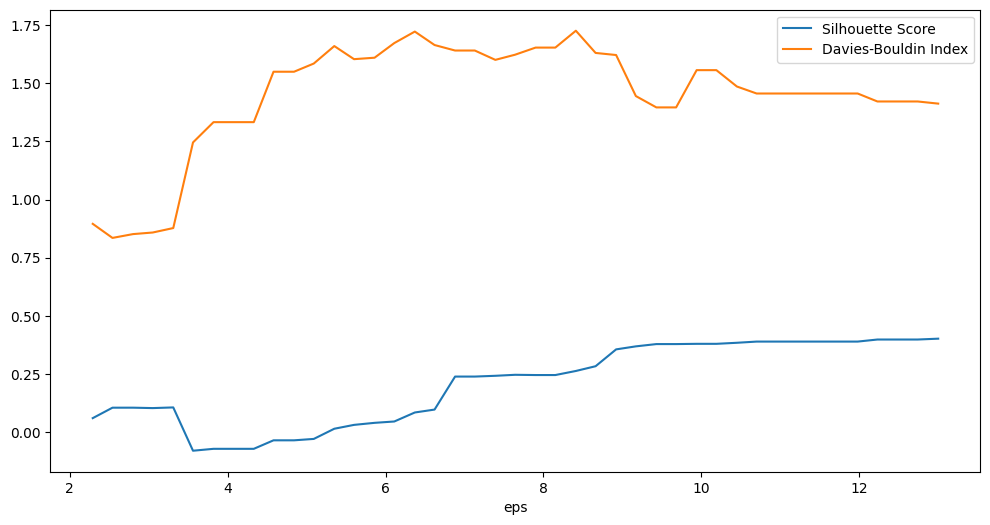

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

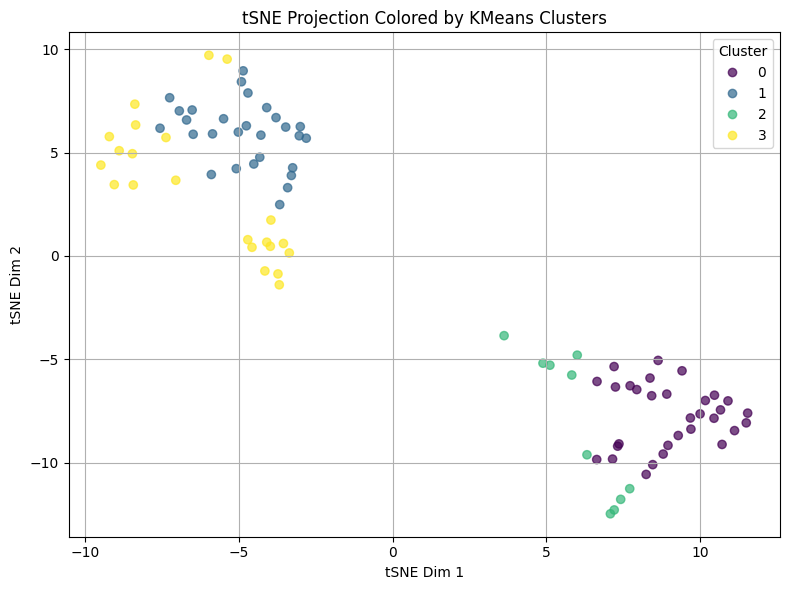

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         4    381          0.994417   
1    0.05            2         4    381          0.994417   
2    0.06            2         4    381          0.994417   
3    0.06            2         5    379          0.992190   
4    0.07            2         6    377          0.990308   
..    ...          ...       ...    ...               ...   
195  0.98            2        16     86          0.082517   
196  0.99            2        16     85          0.086630   
197  0.99            2        16     84          0.086663   
198  1.00            2        17     81          0.089463   
199  1.00            2        17     81          0.089463   

     Davies-Bouldin Index  
0                0.005316  
1                0.005316  
2                0.005316  
3                0.007979  
4                0.010908  
..                    ...  
195              0.599154  
196              0.599823  
197              0.601388  
198              0.611684  
199              0.611684  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

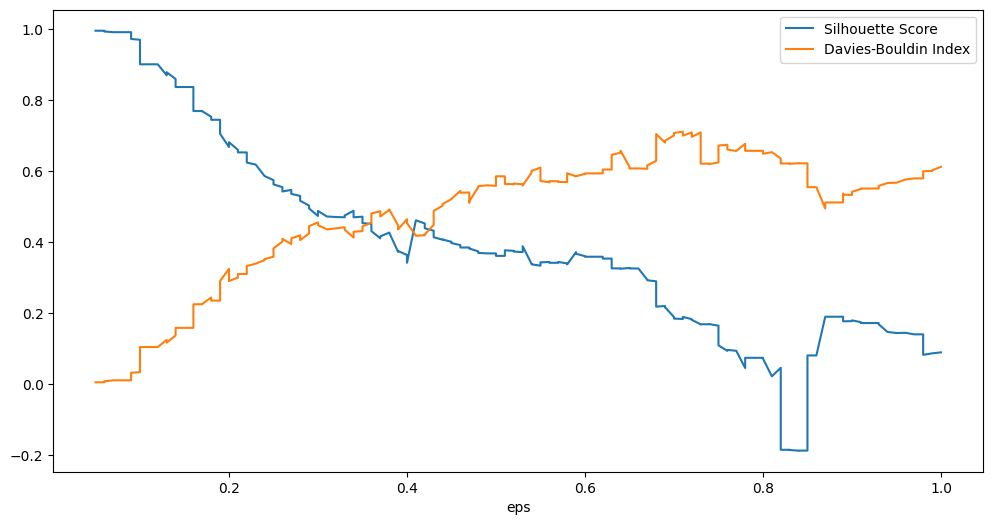

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2019
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2019-12-01 to 2020-02-29
Columns: 379 entries, 10000009 to 22000047
dtypes: float64(379)
memory usage: 270.2 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-12-01  1.255511  0.931271  1.141211  1.121630  0.710240  0.747586   
2019-12-02  1.104979  0.877536  1.045323  1.047820  0.689490  0.733209   
2019-12-03  1.028004  0.853668  1.000320  1.005011  0.688000  0.732178   
2019-12-04  1.143133  0.917015  1.060763  1.072736  0.705573  0.744353   
2019-12-05  1.119520  0.877904  1.029999  1.045749  0.674100  0.722547   
...              ...       ...       ...       ...       ...       ...   
2020-02-25  2.138747  1.847532  3.492366  2.244164  1.636881  1.481469   
2020-02-26  3.085627  1.889830  2.727868  2.457813  1.160456  1.085709   
2020-02-27  2.720339  1.532219  1.898245  2.006303  0.872278  0.846323   
2020-02-28  1.957906  1.413240  1.646326  1.859824  0.930857  0.894984   
2020-02-29  1.913325  1.477148  1.839555  1.917399  1.108618  1.042648   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-12-01  1.978613  1.906866  

          2019-12-01  2019-12-02  2019-12-03  2019-12-04  2019-12-05  \
10000009   -0.073832   -0.091548   -0.097712   -0.068226   -0.056236   
10000010   -0.161109   -0.162197   -0.158608   -0.180084   -0.225334   
10000011   -0.104599   -0.110079   -0.107382   -0.108974   -0.118888   
10000014   -0.109870   -0.109303   -0.105744   -0.103051   -0.107865   
10000016   -0.220605   -0.220607   -0.216476   -0.284683   -0.367969   
...              ...         ...         ...         ...         ...   
9000172    -0.032473   -0.027353   -0.004280    0.037702    0.148855   
9000173     0.356433    0.581138    0.694732    0.915352    0.217457   
9000293     0.366453    0.395831    0.440548    0.592147    0.851987   
9000451     0.322347    0.279192    0.237437    0.273146    0.307986   
22000047   -0.147129   -0.128166   -0.107190   -0.143275   -0.154005   

          2019-12-06  2019-12-07  2019-12-08  2019-12-09  2019-12-10  ...  \
10000009   -0.065087    0.051396   -0.059388    0.002794  

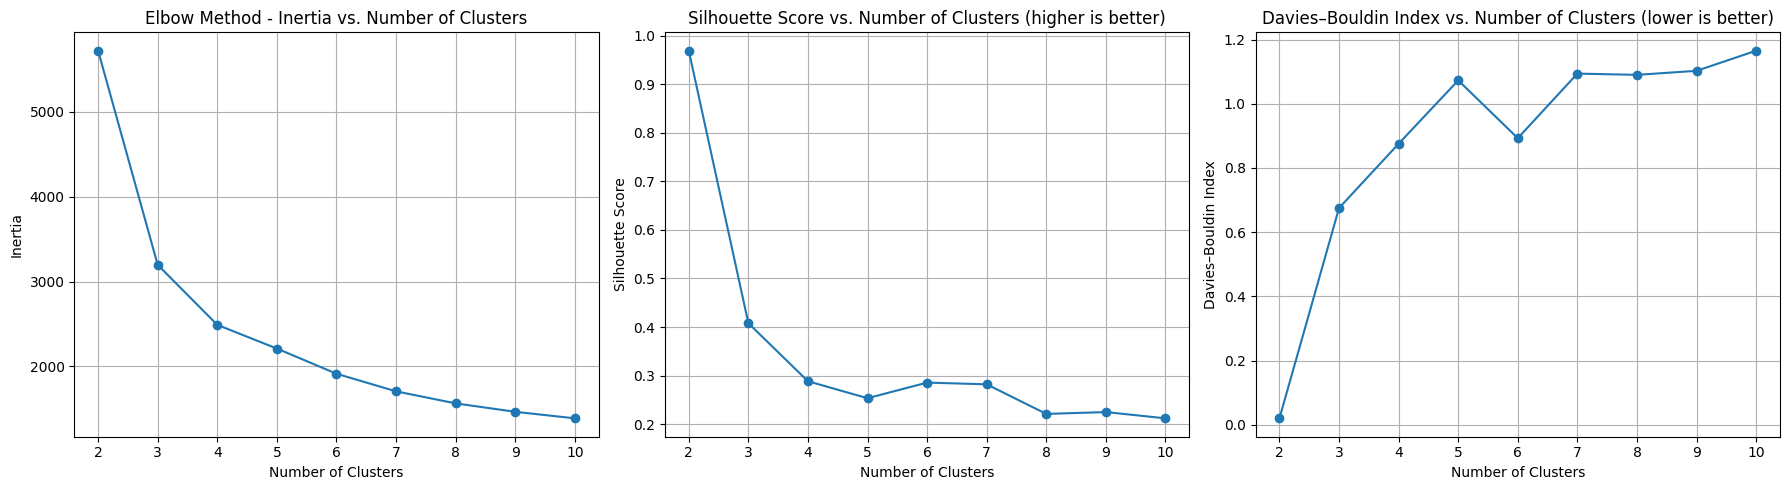

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2019-12-01  1.255511  0.931271  1.141211  1.121630  0.710240  0.747586   
2019-12-02  1.104979  0.877536  1.045323  1.047820  0.689490  0.733209   
2019-12-03  1.028004  0.853668  1.000320  1.005011  0.688000  0.732178   
2019-12-04  1.143133  0.917015  1.060763  1.072736  0.705573  0.744353   
2019-12-05  1.119520  0.877904  1.029999  1.045749  0.674100  0.722547   
...              ...       ...       ...       ...       ...       ...   
2020-02-25  2.138747  1.847532  3.492366  2.244164  1.636881  1.481469   
2020-02-26  3.085627  1.889830  2.727868  2.457813  1.160456  1.085709   
2020-02-27  2.720339  1.532219  1.898245  2.006303  0.872278  0.846323   
2020-02-28  1.957906  1.413240  1.646326  1.859824  0.930857  0.894984   
2020-02-29  1.913325  1.477148  1.839555  1.917399  1.108618  1.042648   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-12-01  1.978613  1.906866  

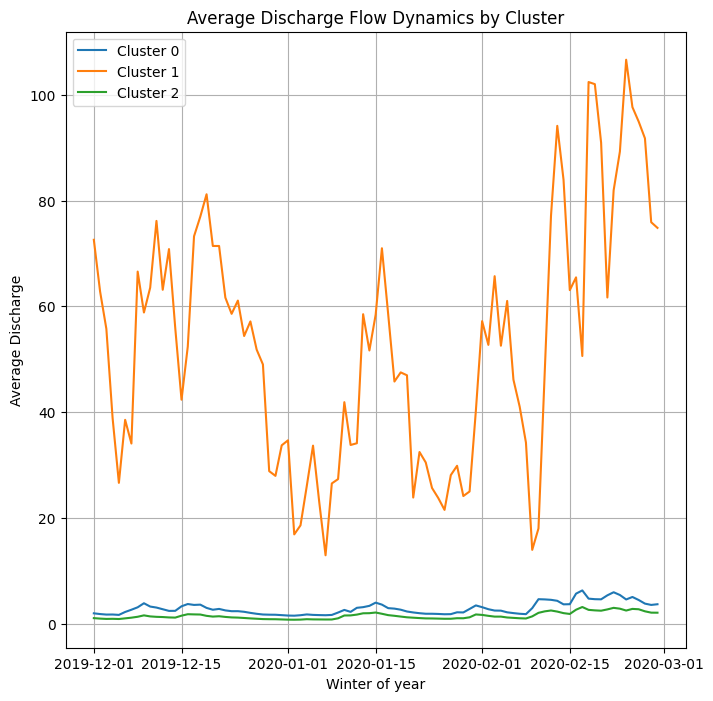

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2019-12-01  1.255511  0.931271  1.141211  1.121630  0.710240  0.747586   
2019-12-02  1.104979  0.877536  1.045323  1.047820  0.689490  0.733209   
2019-12-03  1.028004  0.853668  1.000320  1.005011  0.688000  0.732178   
2019-12-04  1.143133  0.917015  1.060763  1.072736  0.705573  0.744353   
2019-12-05  1.119520  0.877904  1.029999  1.045749  0.674100  0.722547   
...              ...       ...       ...       ...       ...       ...   
2020-02-25  2.138747  1.847532  3.492366  2.244164  1.636881  1.481469   
2020-02-26  3.085627  1.889830  2.727868  2.457813  1.160456  1.085709   
2020-02-27  2.720339  1.532219  1.898245  2.006303  0.872278  0.846323   
2020-02-28  1.957906  1.413240  1.646326  1.859824  0.930857  0.894984   
2020-02-29  1.913325  1.477148  1.839555  1.917399  1.108618  1.042648   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2019-12-01  1.978613  1.906866  2.764792  2.856913  ...  1.165512  2.139756   
2019-12-02  1.615315  1.556742  2.710794  2.618636  ...  1.156065  1.740611   
2019-12-03  1.376646  1.326728  2.637462  2.466883  ...  1.151439  1.445429   
2019-12-04  1.481743  1.428013  2.571914  2.384293  ...  1.569189  1.540010   
2019-12-05  1.298424  1.251341  2.487683  2.249359  ...  1.341996  1.507673   
...              ...       ...       ...       ...  ...       ...       ...   
2020-02-25  5.557864  4.936659  3.292055  3.429938  ...  1.899288  3.362678   
2020-02-26  4.473134  3.993786  3.343103  3.531740  ...  1.881880  3.501465   
2020-02-27  2.094006  1.925789  3.336390  3.181642  ...  1.660529  3.265786   
2020-02-28  1.787078  1.658999  3.312210  3.322388  ...  1.499597  2.979506   
2020-02-29  2.224748  2.039433  3.327131  3.341586  ...  1.475041  2.897438   

             7000333   8000001   9000015   9000172   9000173   9000293  \
2019-12-01  1.377323  2.570765  3.207660  1.409164  2.853977  2.891201   
2019-12-02  1.246563  2.160379  2.888650  1.311650  3.270612  2.674037   
2019-12-03  1.177787  1.901911  2.781700  1.295489  3.296662  2.568968   
2019-12-04  1.318600  2.100025  2.812564  1.357262  3.131399  2.478053   
2019-12-05  1.271223  2.001421  2.904681  1.412562  1.510584  2.417228   
...              ...       ...       ...       ...       ...       ...   
2020-02-25  3.476725  3.777181  5.557099  3.461781  5.965783  3.654109   
2020-02-26  2.398217  3.898593  5.248409  3.429840  7.530010  3.270938   
2020-02-27  1.781951  3.483915  4.288359  1.998529  7.423468  2.958703   
2020-02-28  1.762459  3.091347  3.715844  2.004702  8.142967  3.143715   
2020-02-29  1.986770  2.959666  3.370177  2.991445  6.125948  3.697341   

             9000451  22000047  
2019-12-01  2.727344  0.983210  
2019-12-02  2.298531  0.987094  
2019-12-03  1.987490  1.000869  
2019-12-04  1.833203  0.991423  
2019-12-05  1.639936  0.979822  
...              ...       ...  
2020-02-25  3.904069  0.855462  
2020-02-26  4.491918  0.824404  
2020-02-27  4.270191  0.814776  
2020-02-28  4.016242  0.836880  
2020-02-29  3.867235  0.839325  

[91 rows x 379 columns]

<Axes: >

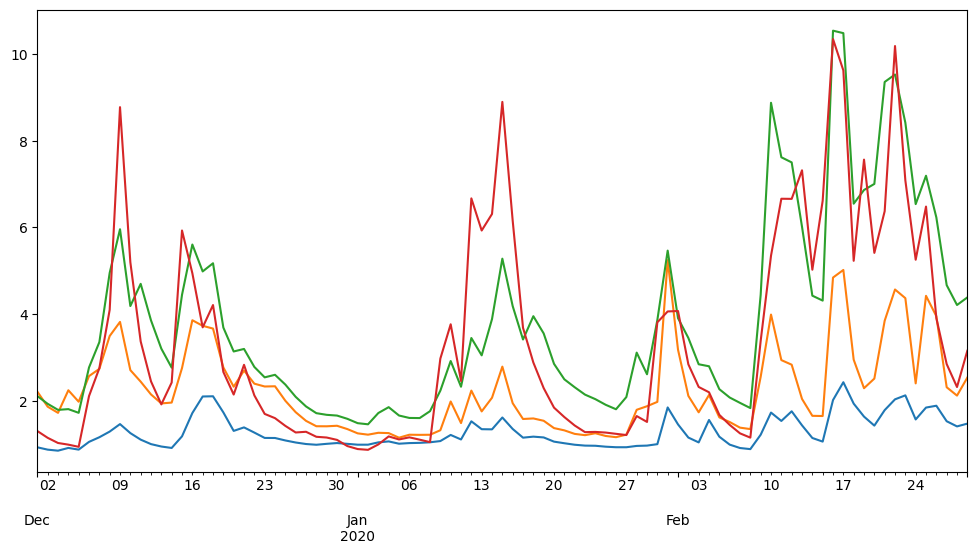

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

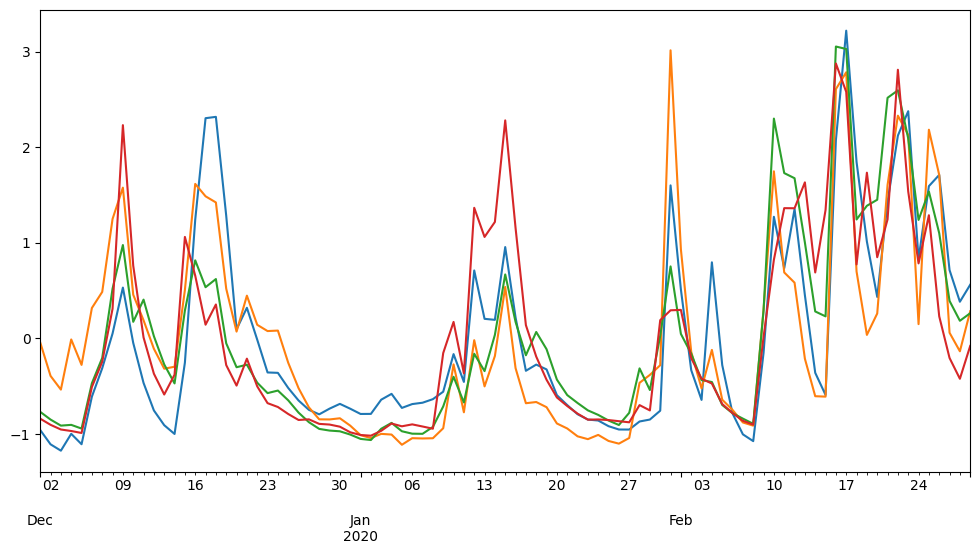

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

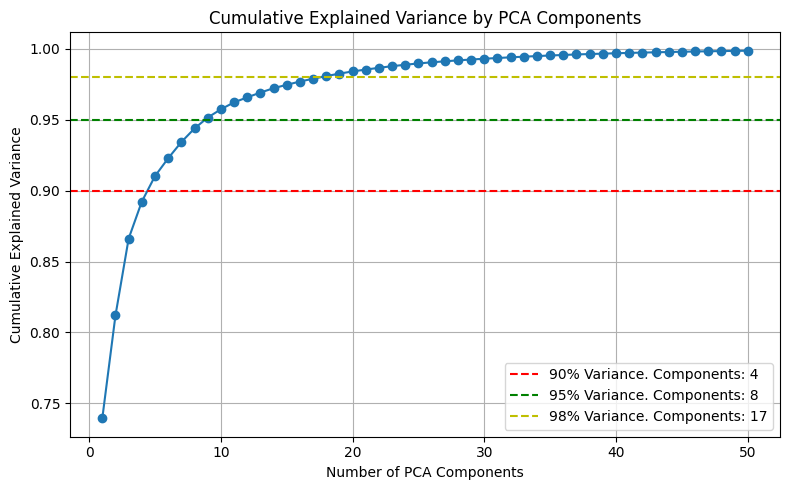

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-12.73647717,   1.41295685,  -2.44698005, ...,   0.07510544,
          0.31393925,   1.13025292],
       [-15.00092556,   0.83988122,  -2.33899516, ...,  -0.13670734,
          0.3003597 ,   1.03055037],
       [-16.54327188,   0.71881599,  -2.2796956 , ...,  -0.18193632,
          0.07882508,   0.93747933],
       ...,
       [ 22.59559718,  -8.46174345, -11.55826154, ...,   0.76141905,
          0.26739654,  -0.12147028],
       [ 16.9299641 ,  -6.43827607, -11.34281658, ...,   2.46900219,
          0.17732676,  -0.14536522],
       [ 17.39314222,  -3.42436951,  -9.45483951, ...,   2.85718528,
         -0.04213392,   0.7497648 ]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


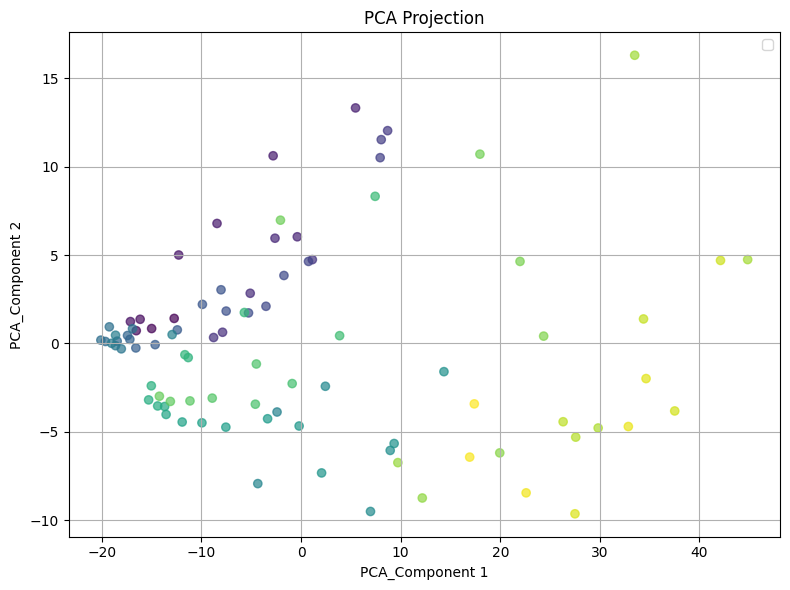

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_47116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


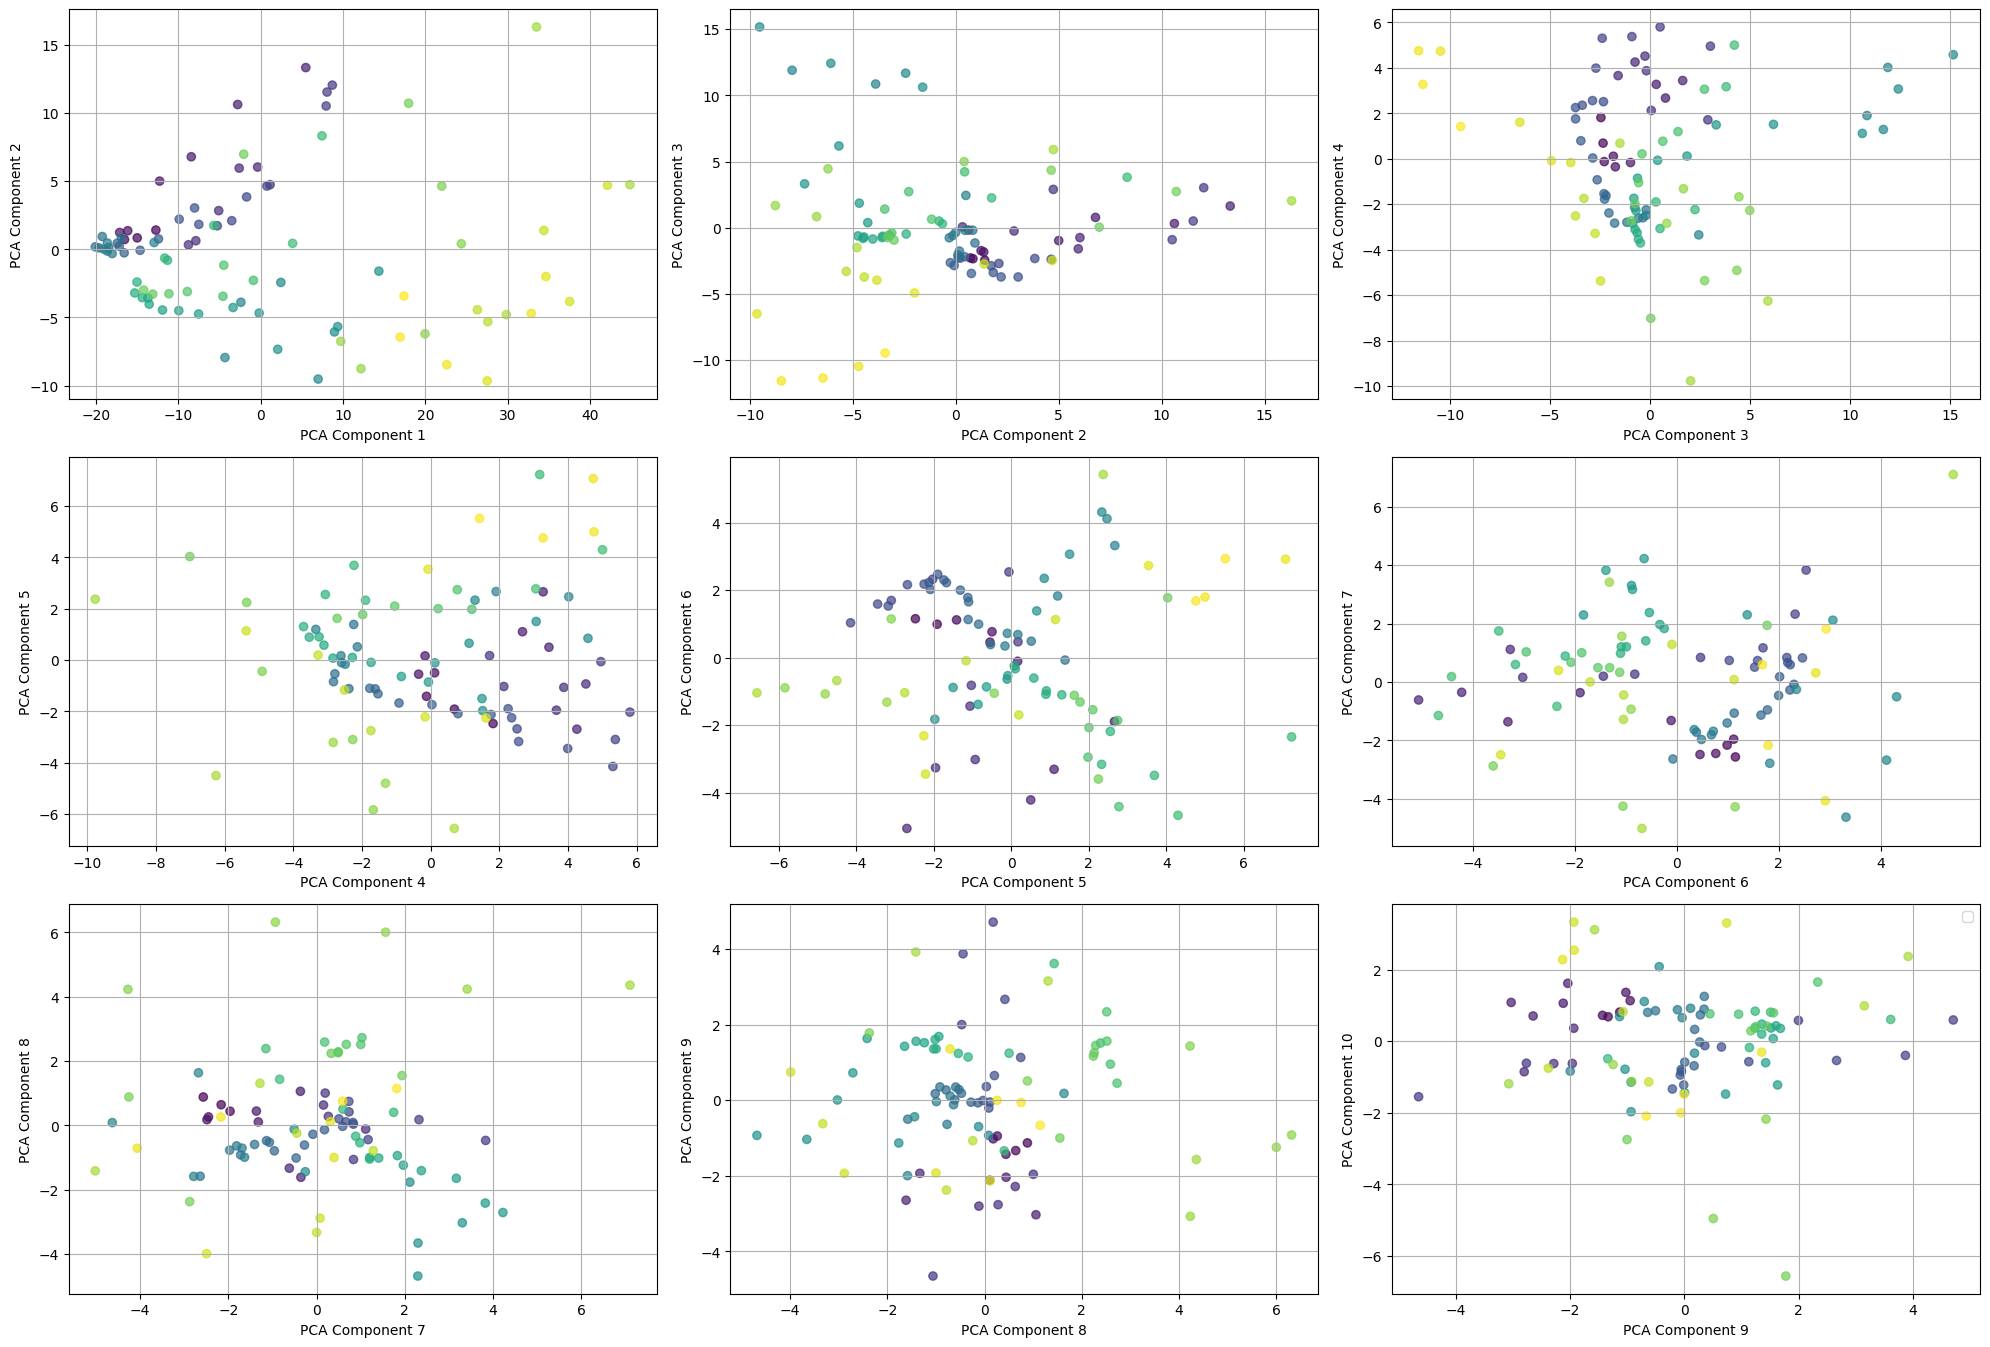

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.386
KMeans Davies-Bouldin Index is 1.180


<Axes: xlabel='k'>

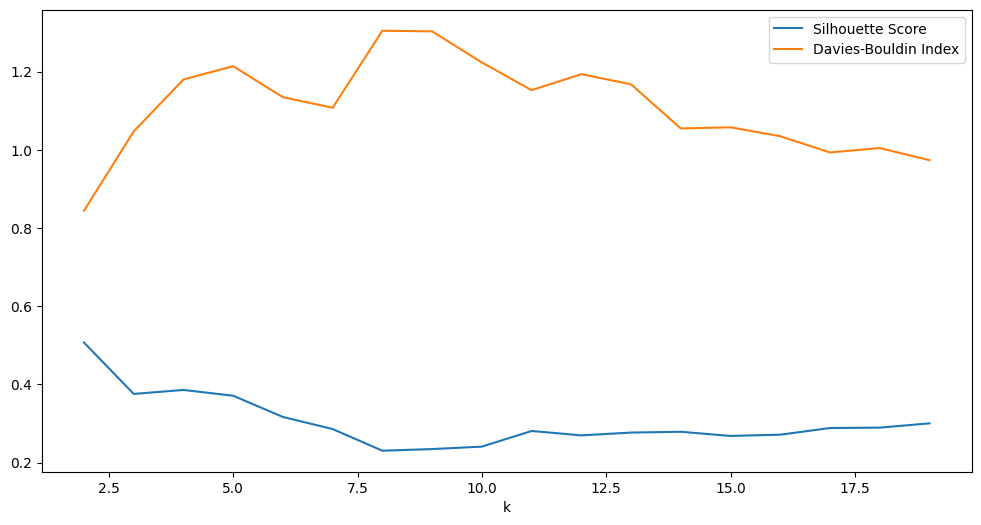

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         2     85         -0.183384   
4    1.52            3         3     79         -0.093476   
5    1.78            3         3     78         -0.077622   
6    2.03            3         4     70          0.007025   
7    2.29            3         4     67         -0.020485   
8    2.54            3         5     62          0.019283   
9    2.80            3         5     60          0.029649   
10   3.05            3         5     58          0.057233   
11   3.31            3         4     55          0.051485   
12   3.56            3         4     55          0.051485   
13   3.82            3         4     54          0.042720   
14   4.07            3         3     54          0.067910   
15   4.33            3         4     51          0.012281   
16   4.58            3         4     51          0.012281   
17   4.84            3         4     48         -0.002164   
18   5.09            3         4     46          0.022684   
19   5.35            3         3     40          0.096970   
20   5.60            3         3     40          0.096970   
21   5.86            3         3     40          0.096970   
22   6.11            3         3     39          0.108439   
23   6.37            3         3     39          0.108439   
24   6.62            3         2     38          0.092611   
25   6.88            3         3     33          0.094554   
26   7.13            3         2     33          0.309603   
27   7.39            3         2     33          0.309603   
28   7.64            3         3     28          0.297170   
29   7.90            3         3     28          0.297170   
30   8.15            3         4     25          0.283682   
31   8.41            3         5     21          0.237721   
32   8.66            3         5     21          0.237721   
33   8.92            3         5     20          0.229823   
34   9.17            3         5     19          0.231408   
35   9.43            3         6     15          0.240292   
36   9.68            3         5     13          0.292960   
37   9.94            3         4     13          0.322365   
38  10.19            3         4     12          0.323171   
39  10.45            3         4     12          0.323171   
40  10.70            3         4     12          0.323171   
41  10.96            3         4     11          0.327958   
42  11.21            3         4      9          0.363583   
43  11.47            3         4      8          0.380584   
44  11.72            3         4      5          0.388941   
45  11.98            3         4      5          0.388941   
46  12.23            3         4      5          0.388941   
47  12.49            3         4      4          0.389340   
48  12.74            3         3      3          0.423394   
49  13.00            3         2      2          0.473232   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.052645  
4               0.970548  
5               0.963263  
6               0.895406  
7               1.021521  
8               0.961819  
9               0.936606  
10              0.938137  
11              1.234266  
12              1.234266  
13              1.310753  
14              1.399554  
15              1.365386  
16              1.365386  
17              1.374924  
18              1.356408  
19              1.361161  
20              1.361161  
21              1.361161  
22              1.335939  
23              1.335939  
24              1.228373  
25              1.297121  
26              1.173093  
27              1.173093  
28              1.222133  
29              1.222133  
30              1.388035  
31              1.316107  
32 

<Axes: xlabel='eps'>

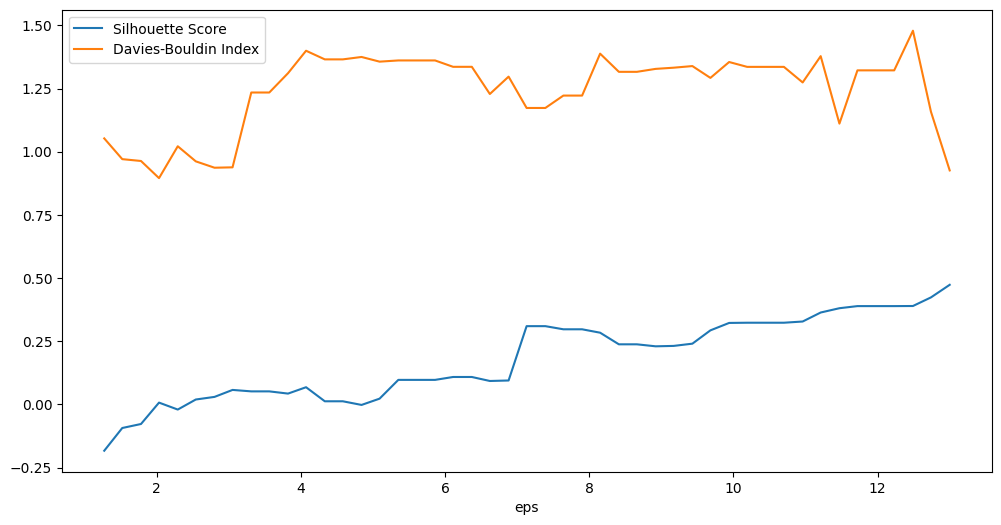

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

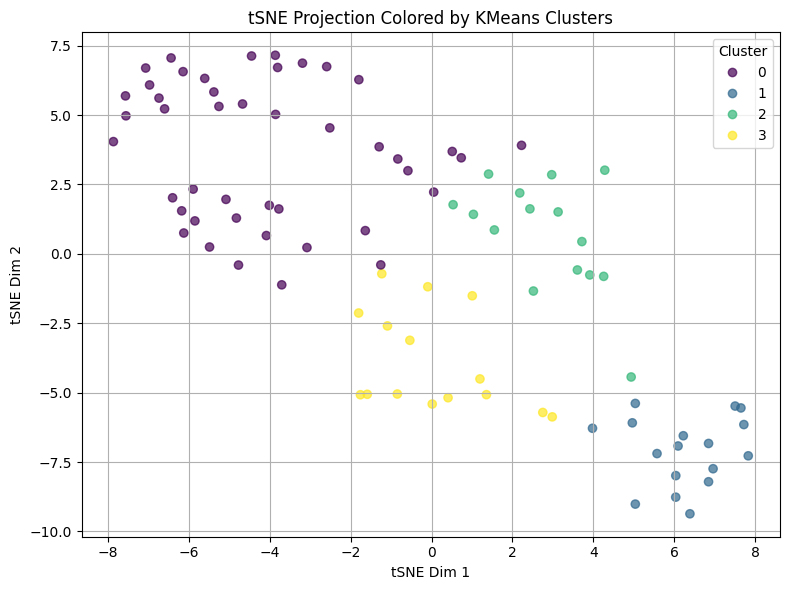

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         2    375          0.999652   
1    0.05            2         2    375          0.999652   
2    0.06            2         2    375          0.999652   
3    0.06            2         2    375          0.999652   
4    0.07            2         2    375          0.999652   
..    ...          ...       ...    ...               ...   
195  0.98            2         9     62         -0.049113   
196  0.99            2         9     62         -0.049113   
197  0.99            2         9     62         -0.049113   
198  1.00            2         8     62          0.103122   
199  1.00            2         8     61          0.102097   

     Davies-Bouldin Index  
0                0.000348  
1                0.000348  
2                0.000348  
3                0.000348  
4                0.000348  
..                    ...  
195              0.711949  
196              0.711949  
197              0.711949  
198              0.592658  
199              0.593405  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

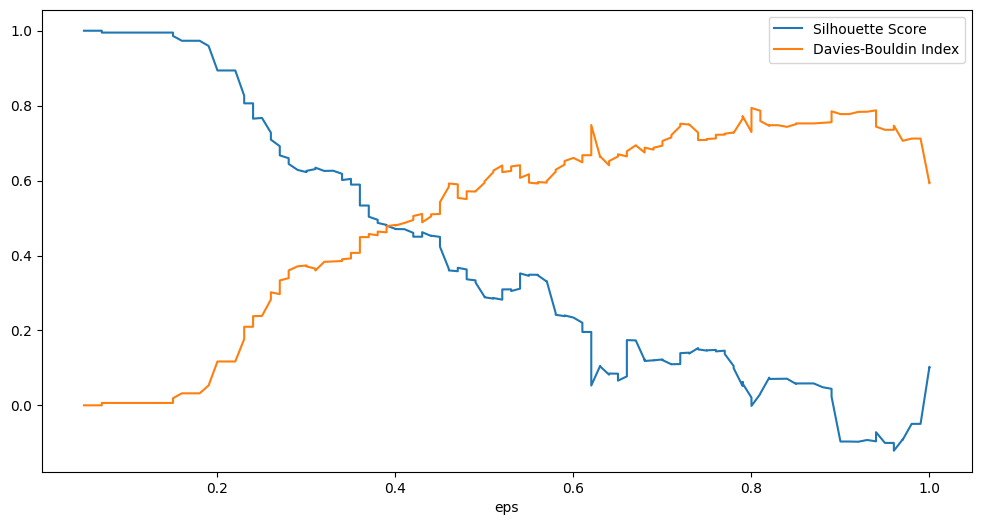

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))